In [1]:
import joblib

In [2]:
import random 
import numpy as np
import tensorflow as tf

# data preperation

In [97]:
gesture = joblib.load("csi_up_data.joblib")

In [98]:
labels = joblib.load("labels_data.joblib")

In [99]:
gesture.shape

(200, 30, 3, 2760)

In [100]:
(gesture[0][0][0][1])

(15.248446951029349+9.530279344393342j)

In [101]:
amplitude = np.zeros(shape = (200, 30, 3, 2760))
for timestep in range(200):
    for antenna in range(30):
        for subcar in range(3):
            for sample in range(2760):
                amplitude[timestep][antenna][subcar][sample] = abs(gesture[timestep][antenna][subcar][sample])
          

In [102]:
phase = np.zeros(shape = (200, 30, 3, 2760))
for timestep in range(200):
    for antenna in range(30):
        for subcar in range(3):
            for sample in range(2760):
                phase[timestep][antenna][subcar][sample] = np.angle(gesture[timestep][antenna][subcar][sample])

In [103]:
np.shape(amplitude), np.shape(phase)

((200, 30, 3, 2760), (200, 30, 3, 2760))

In [104]:
import numpy as np

# data = np.zeros(shape = (200, 3, 30, 2760))
csi_amp = np.zeros(shape = (2760, 200, 90))

for sample in range(2760):
  for timestep in range(200):
    for antenna in range(30):
      for subcar in range(3):
        csi_amp[sample][timestep][3*antenna+subcar] = amplitude[timestep][antenna][subcar][sample]


In [105]:
# data = np.zeros(shape = (200, 3, 30, 5520))
csi_phase = np.zeros(shape = (2760, 200, 90))

for sample in range(2760):
  for timestep in range(200):
    for antenna in range(30):
      for subcar in range(3):
        csi_phase[sample][timestep][3*antenna+subcar] = phase[timestep][antenna][subcar][sample]

In [106]:
np.shape(csi_amp), np.shape(csi_phase)

((2760, 200, 90), (2760, 200, 90))

In [703]:
amplitude_variances = np.var(csi_amp, axis=(0, 1))
phase_variances = np.var(csi_phase, axis=(0, 1))

# Find the indices of the 10 subcarriers with the highest variance for amplitude and phase
top_10_amplitude_indices = np.argsort(amplitude_variances)
top_10_phase_indices = np.argsort(phase_variances)

# Print the indices of the top 10 subcarriers with the highest variance
print("Indices of top 10 subcarriers with highest amplitude variance:", top_10_amplitude_indices)
print("Indices of top 10 subcarriers with highest phase variance:", top_10_phase_indices)

Indices of top 10 subcarriers with highest amplitude variance: [ 1 37 85 88 28 40 34 82 43 79 25 31 55 76 46  4 22 58  7 73 49 74 77 26
  0 52 23 70 71  2 19 29 38 68 62 14 41 89 67 11 10 65 80 86 16 20 83 35
 17 13 32 59 44 61 64  8 56  5 47 53 75 72 42 60 39 24 27 78 36 45 81 63
 12 84  9 57 21 48 50 33 18 69 66 30 51  3 15 54 87  6]
Indices of top 10 subcarriers with highest phase variance: [ 0  1  2 53 50 56 80 77  5 20 59 23 71 21 22 34 74 33 47 17 10 29 26 35
 61 11 62 64 70 89 67  8 68 46 65 44 49 85 88 58 83 32 40 41 86 69 73 25
  4 19 52 16 13 87 37 75 72 36 43 48 76 38 82 14  9 18 31 78 81 84 51 79
 55 28 57 66 15  7 45 54 39 24 12 60 63 42  6 30  3 27]


In [704]:
csi_amp_3 = np.array(csi_amp)[:, :,[30,3,27]]
csi_phase_3 = np.array(csi_phase)[:,:,[30,3,27]]

In [705]:
combined = np.concatenate((csi_amp_3, csi_phase_3), axis=-1)

In [706]:
np.shape(combined)

(2760, 200, 6)

In [110]:
np.array(labels)

array([[  1],
       [  2],
       [  3],
       ...,
       [274],
       [275],
       [276]], dtype=uint16)

In [111]:
labels = np.array(labels) - 1

In [707]:
np.max(labels)

275

In [708]:
temp = list(zip(combined, labels))
random.shuffle(temp)
combined, labels = zip(*temp)
combined, labels = list(combined), list(labels)

In [709]:
y_train = tf.constant(labels[:1500])
y_val = tf.constant(labels[1500:2000])
y_test = tf.constant(labels[2000:2760])
x_train = (combined[:1500])
x_val = (combined[1500:2000])
x_test = (combined[2000:2760])


In [710]:
# Verify shapes (optional)
print("Shapes:")
print("x_train shape:", np.shape(x_train))
print("x_val shape:", np.shape(x_val))
print("x_test shape:", np.shape(x_test))
print("y_train shape:", np.shape(y_train))
print("y_val shape:", np.shape(y_val))
print("y_test shape:", np.shape(y_test))

Shapes:
x_train shape: (1500, 200, 6)
x_val shape: (500, 200, 6)
x_test shape: (760, 200, 6)
y_train shape: (1500, 1)
y_val shape: (500, 1)
y_test shape: (760, 1)


In [116]:
np.min(y_test)

0

In [117]:
np.shape(x_train)

(1500, 200, 6)

In [118]:
np.shape(x_test)

(760, 200, 6)

# trying models


In [119]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Conv1D, MaxPool1D, Flatten, Dense, GlobalMaxPooling1D, Masking, Input
model_1 = models.Sequential([
    # layers.Masking(mask_value = 0.0, input_shape = (None,90), ragged = True),
    # layers.Input([None, 90], dtype=tf.float16, ragged=True),
    layers.Conv1D(filters=128, kernel_size=(1), activation='relu', input_shape = (200, 90)),
    layers.MaxPooling1D((2)),
    
    layers.Conv1D(filters=64, kernel_size=(1), activation='relu'),
    layers.MaxPooling1D((2)),
    # layers.BatchNormalization(),
    
    layers.GlobalMaxPooling1D(),
    layers.Dense(64, activation='relu'),
    layers.Dense(276, activation='softmax')
])

model_1.compile(loss="sparse_categorical_crossentropy", 
                optimizer=tf.keras.optimizers.legacy.Adam(),
                metrics=["accuracy"])

In [120]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_55 (Conv1D)          (None, 200, 128)          11648     
                                                                 
 max_pooling1d_33 (MaxPooli  (None, 100, 128)          0         
 ng1D)                                                           
                                                                 
 conv1d_56 (Conv1D)          (None, 100, 64)           8256      
                                                                 
 max_pooling1d_34 (MaxPooli  (None, 50, 64)            0         
 ng1D)                                                           
                                                                 
 global_max_pooling1d (Glob  (None, 64)                0         
 alMaxPooling1D)                                                 
                                                        

In [121]:
np.shape(x_train[0][0])

(6,)

In [122]:
model_1.fit(np.array(x_train), np.array(y_train), epochs = 50)

Epoch 1/50


ValueError: in user code:

    File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py", line 1377, in train_function  *
        return step_function(self, iterator)
    File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py", line 1360, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py", line 1349, in run_step  **
        outputs = model.train_step(data)
    File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py", line 1126, in train_step
        y_pred = self(x, training=True)
    File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 200, 90), found shape=(None, 200, 6)


In [ ]:
model_1.evaluate(np.array(x_test), np.array(y_test))

24/24 [==============================] - 0s 3ms/step - loss: 3.8359 - accuracy: 0.2895


[3.8358521461486816, 0.28947368264198303]

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Conv1D, MaxPool1D, Flatten, Dense, GlobalMaxPooling1D, Masking, Input
model_2 = models.Sequential([
    # layers.Masking(mask_value = 0.0, input_shape = (None,90), ragged = True),
    # layers.Input([None, 90], dtype=tf.float16, ragged=True),
    layers.Conv1D(filters=32, kernel_size=(3), activation='relu', input_shape = (200, 90)),
    layers.MaxPooling1D((2)),
    
    layers.Conv1D(filters=64, kernel_size=(3), activation='relu'),
    # layers.MaxPooling1D((2)),
    layers.BatchNormalization(),
    
    layers.GlobalMaxPooling1D(),
    layers.Dense(64, activation='relu'),
    layers.Dense(276, activation='softmax')
])
# sgdm_optimizer = tf.keras.optimizers.experimental.SGD(learning_rate=0.1, momentum=0.9)
model_2.compile(loss="sparse_categorical_crossentropy", 
                optimizer=tf.keras.optimizers.experimental.SGD(learning_rate=0.1, momentum=0.9),
                metrics=["accuracy"])

In [ ]:
model_2.fit(np.array(x_train), np.array(y_train), epochs = 50)

In [ ]:
model_2.evaluate(np.array(x_test), np.array(y_test))

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, Input, Model
from tensorflow.keras.layers import GRU, Dense, Dropout, LSTM, TimeDistributed

def transformer_mid():
  inp = Input(shape = (200, 90))

  #   Q, K, V (non-linear)
  #inp = Reshape((620, 1))(inp)
  x_k = layers.TimeDistributed(Dense(32, activation = 'relu'))(inp)
  x_k = TimeDistributed(Dropout(0.4))(x_k)
  x_k = layers.TimeDistributed(Dense(32, activation = 'relu'), name='key')(x_k)

  x_q = layers.TimeDistributed(Dense(32, activation = 'relu'))(inp)
  x_q = TimeDistributed(Dropout(0.4))(x_q)
  x_q = layers.TimeDistributed(Dense(32, activation = 'relu'), name='query')(x_q)

  x_v = layers.TimeDistributed(Dense(32, activation = 'relu'))(inp)
  x_v = TimeDistributed(Dropout(0.4))(x_v)
  x_v = layers.TimeDistributed(Dense(32, activation = 'relu'), name='value')(x_v)

  #   QKT/sqrt(d_model)
  kqT = tf.linalg.matmul(x_q, x_k, transpose_b=True, name='QKT')*tf.constant(0.176)

  #   ROW-WISE SOFTMAX
  sfmx = tf.nn.softmax(kqT, axis=1)
  attn = tf.linalg.matmul(sfmx, x_v, name='penultimate')

  #   FINAL OUTPUT
  out = layers.TimeDistributed(Dense(276))(attn)
  model = Model(inputs = inp, outputs = out)
  model.summary()
  return model

m = transformer_mid()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 200, 90)]            0         []                            
                                                                                                  
 time_distributed_2 (TimeDi  (None, 200, 32)              2912      ['input_1[0][0]']             
 stributed)                                                                                       
                                                                                                  
 time_distributed (TimeDist  (None, 200, 32)              2912      ['input_1[0][0]']             
 ributed)                                                                                         
                                                                                              

In [ ]:
m.compile(loss="sparse_categorical_crossentropy", 
                optimizer=tf.keras.optimizers.legacy.Adam(),
                metrics=["accuracy"])

In [30]:
np.shape(x_train)

(2000, 200, 90)

In [ ]:
m.fit(np.array(x_train), np.array(y_train), epochs = 10)

In [2]:
from tensorflow.keras.models import load_model
model_gd = load_model('model_2.h5')

In [29]:
model_gd.evaluate(np.array(x_train), np.array(y_train))

63/63 [==============================] - 1s 6ms/step - loss: 90.5095 - accuracy: 0.0080


[90.5095443725586, 0.00800000037997961]

# model_2

In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Conv1D, MaxPool1D, Flatten, Dense, GlobalMaxPooling1D, Masking, Input

model_2 = models.Sequential([
    layers.BatchNormalization(),
    layers.Conv1D(filters=32, kernel_size=(7), activation='relu', input_shape = (200, 90)),
    layers.MaxPooling1D((2)),

    layers.Conv1D(filters=64, kernel_size=(4), activation='relu'),
    layers.Conv1D(filters=64, kernel_size=(4), activation='relu'),
    layers.MaxPooling1D((2)),
    
    layers.Conv1D(filters=128, kernel_size=(4), activation='relu'),
    layers.Conv1D(filters=128, kernel_size=(4), activation='relu'),
    layers.MaxPooling1D((2)),
    
    layers.GlobalMaxPooling1D(),

    layers.Dense(128, activation='relu'),
    layers.Dense(276, activation='softmax')
])

model_2.compile(loss="sparse_categorical_crossentropy", 
                optimizer=tf.keras.optimizers.legacy.Adam(),
                metrics=["accuracy"])

In [27]:
model_2.fit(np.array(x_train), np.array(y_train), epochs = 20)

Epoch 1/20
63/63 [==============================] - 2s 19ms/step - loss: 5.3743 - accuracy: 0.0150
Epoch 2/20
63/63 [==============================] - 1s 20ms/step - loss: 4.0580 - accuracy: 0.0620
Epoch 3/20
63/63 [==============================] - 1s 18ms/step - loss: 3.1907 - accuracy: 0.1625
Epoch 4/20
63/63 [==============================] - 1s 20ms/step - loss: 2.7618 - accuracy: 0.2235
Epoch 5/20
63/63 [==============================] - 1s 20ms/step - loss: 2.4239 - accuracy: 0.3050
Epoch 6/20
63/63 [==============================] - 1s 20ms/step - loss: 1.9727 - accuracy: 0.4290
Epoch 7/20
63/63 [==============================] - 1s 18ms/step - loss: 1.6213 - accuracy: 0.5100
Epoch 8/20
63/63 [==============================] - 1s 18ms/step - loss: 1.3050 - accuracy: 0.6160
Epoch 9/20
63/63 [==============================] - 1s 18ms/step - loss: 1.1238 - accuracy: 0.6675
Epoch 10/20
63/63 [==============================] - 1s 18ms/step - loss: 0.9121 - accuracy: 0.7200
Epoch 11/

In [28]:
model_2.evaluate(np.array(x_test), np.array(y_test))

24/24 [==============================] - 0s 7ms/step - loss: 0.5856 - accuracy: 0.8158


[0.5856219530105591, 0.8157894611358643]

In [25]:
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (Batch  (None, 200, 90)           360       
 Normalization)                                                  
                                                                 
 conv1d (Conv1D)             (None, 194, 32)           20192     
                                                                 
 max_pooling1d (MaxPooling1  (None, 97, 32)            0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 94, 64)            8256      
                                                                 
 conv1d_2 (Conv1D)           (None, 91, 64)            16448     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 45, 64)            0

In [39]:
a = np.random.rand(5,4,3,2)
b = np.random.rand(2,2,2,3)

In [41]:
b

array([[[[0.31897836, 0.11064455, 0.87486736],
         [0.1601562 , 0.53903031, 0.43403518]],

        [[0.55491494, 0.87925592, 0.77658073],
         [0.0409227 , 0.26965137, 0.29632147]]],


       [[[0.46670649, 0.99980276, 0.25899502],
         [0.87074491, 0.68126889, 0.50476343]],

        [[0.43342808, 0.5364656 , 0.73412034],
         [0.43642995, 0.3495513 , 0.71503663]]]])

In [42]:
x_train.shape

AttributeError: 'list' object has no attribute 'shape'

# running model_2 on only on subcarrier

In [29]:
np.shape(x_train)

(2000, 200, 90)

In [34]:
x_train = np.array(x_train)

In [36]:
sub_1_train = x_train[:, :, 0:1]

In [37]:
sub_1_train.shape

(2000, 200, 1)

In [40]:
sub_1_test = np.array(x_test)[:, :, :1]

In [41]:
sub_1_test.shape

(760, 200, 1)

In [45]:
np.max(y_train)

275

In [88]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Conv1D, MaxPool1D, Flatten, Dense, GlobalMaxPooling1D, Masking, Input

model_2_sub = models.Sequential([
    layers.BatchNormalization(),
    layers.Conv1D(filters=32, kernel_size=(7), activation='relu', input_shape = (200, 1)),
    layers.MaxPooling1D((2)),

    layers.Conv1D(filters=64, kernel_size=(4), activation='relu'),
    layers.Conv1D(filters=64, kernel_size=(4), activation='relu'),
    layers.MaxPooling1D((2)),
    
    layers.Conv1D(filters=128, kernel_size=(4), activation='relu'),
    layers.Conv1D(filters=128, kernel_size=(4), activation='relu'),
    layers.MaxPooling1D((2)),
    
    layers.GlobalMaxPooling1D(),

    layers.Dense(128, activation='relu'),
    layers.Dense(276, activation='softmax')
])

model_2_sub.compile(loss="sparse_categorical_crossentropy", 
                optimizer=tf.keras.optimizers.legacy.Adam(),
                metrics=["accuracy"])

In [89]:
model_2_sub.fit(np.array(sub_1_train), np.array(y_train), epochs = 50)

Epoch 1/50
63/63 [==============================] - 1s 12ms/step - loss: 5.5088 - accuracy: 0.0050
Epoch 2/50
63/63 [==============================] - 1s 11ms/step - loss: 4.8423 - accuracy: 0.0170
Epoch 3/50
63/63 [==============================] - 1s 11ms/step - loss: 4.4619 - accuracy: 0.0380
Epoch 4/50
63/63 [==============================] - 1s 11ms/step - loss: 4.1162 - accuracy: 0.0765
Epoch 5/50
63/63 [==============================] - 1s 11ms/step - loss: 3.7090 - accuracy: 0.1375
Epoch 6/50
63/63 [==============================] - 1s 11ms/step - loss: 3.2600 - accuracy: 0.2260
Epoch 7/50
63/63 [==============================] - 1s 11ms/step - loss: 2.9632 - accuracy: 0.2775
Epoch 8/50
63/63 [==============================] - 1s 11ms/step - loss: 2.5826 - accuracy: 0.3560
Epoch 9/50
63/63 [==============================] - 1s 11ms/step - loss: 2.3219 - accuracy: 0.3970
Epoch 10/50
63/63 [==============================] - 1s 11ms/step - loss: 2.1450 - accuracy: 0.4275
Epoch 11/

In [90]:
model_2_sub.evaluate(np.array(sub_1_test), np.array(y_test))

24/24 [==============================] - 0s 5ms/step - loss: 1.3610 - accuracy: 0.7500


[1.3609789609909058, 0.75]

In [53]:
sub_1_train.shape


(2000, 200, 1)

In [65]:
from tensorflow.keras.layers import Conv1D, MaxPool1D, Flatten, Dense, GlobalAveragePooling1D, Masking, Input, MaxPooling1D, GlobalMaxPooling1D, Add, Dropout

In [67]:
from tensorflow.keras.models import Model

In [84]:
dataInp = Input(shape = (200, 1))
kernel_size = 3

# TEACHER MODEL
x_T = Conv1D(kernel_size = 7, filters=32, activation='relu')(dataInp) # 194, 32
x_T = MaxPooling1D(2)(x_T) # 97, 32
x_T = Conv1D(kernel_size = 5, filters=64, activation='relu')(x_T) # 93, 64
x_T = MaxPooling1D(2)(x_T) # 46, 64
x_T = Conv1D(kernel_size = kernel_size, filters=256, activation='relu')(x_T) # 44, 256
x_b_T = Conv1D(kernel_size = kernel_size, filters=32, activation='relu')(x_T) # 42, 32
x_T = MaxPooling1D(2)(x_b_T) # 21, 32
x_T = Conv1D(kernel_size = kernel_size, filters=512, activation='relu')(x_T) # 19, 512
avg_T = GlobalAveragePooling1D()(x_T)
max_T = GlobalMaxPooling1D()(x_T)
flat_T = Add()([avg_T, max_T])
d_T = Dense(300, activation = 'relu')(flat_T)
d_T = Dropout(0.3)(d_T)
out_T = Dense(276, activation = 'sigmoid')(d_T)

model = Model(inputs=dataInp, outputs=out_T, name='teacher' )
model.compile(loss = "sparse_categorical_crossentropy", optimizer = 'adam', metrics=["accuracy"])

In [85]:
model.summary()

Model: "teacher"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_11 (InputLayer)       [(None, 200, 1)]             0         []                            
                                                                                                  
 conv1d_66 (Conv1D)          (None, 194, 32)              256       ['input_11[0][0]']            
                                                                                                  
 max_pooling1d_39 (MaxPooli  (None, 97, 32)               0         ['conv1d_66[0][0]']           
 ng1D)                                                                                            
                                                                                                  
 conv1d_67 (Conv1D)          (None, 93, 64)               10304     ['max_pooling1d_39[0][0]

In [86]:
model.fit(np.array(sub_1_train), np.array(y_train), epochs = 50)

Epoch 1/50
63/63 [==============================] - 1s 10ms/step - loss: 5.6534 - accuracy: 0.0030
Epoch 2/50
63/63 [==============================] - 1s 11ms/step - loss: 5.3977 - accuracy: 0.0085
Epoch 3/50
63/63 [==============================] - 1s 12ms/step - loss: 5.0793 - accuracy: 0.0090
Epoch 4/50
63/63 [==============================] - 1s 10ms/step - loss: 4.8573 - accuracy: 0.0175
Epoch 5/50
63/63 [==============================] - 1s 11ms/step - loss: 4.5975 - accuracy: 0.0425
Epoch 6/50
63/63 [==============================] - 1s 11ms/step - loss: 4.3219 - accuracy: 0.0740
Epoch 7/50
63/63 [==============================] - 1s 11ms/step - loss: 4.0639 - accuracy: 0.1035
Epoch 8/50
63/63 [==============================] - 1s 11ms/step - loss: 3.7955 - accuracy: 0.1585
Epoch 9/50
63/63 [==============================] - 1s 13ms/step - loss: 3.6189 - accuracy: 0.1880
Epoch 10/50
63/63 [==============================] - 1s 12ms/step - loss: 3.4206 - accuracy: 0.2140
Epoch 11/

In [87]:
model.evaluate(np.array(sub_1_test), np.array(y_test))

24/24 [==============================] - 0s 5ms/step - loss: 1.9151 - accuracy: 0.6303


[1.9150515794754028, 0.6302631497383118]

# testing model on 3 sub carrier

In [22]:
y_train.shape

TensorShape([1500, 1])

In [24]:
np.shape(x_train)

(1500, 200, 90)

In [25]:
sub_3_train = np.array(x_train)[:, :, [0, 1, 2]]

In [26]:
sub_3_train.shape

(1500, 200, 3)

In [27]:
sub_3_test = np.array(x_test)[:, :, [0, 1, 2]]

In [28]:
sub_3_test.shape

(760, 200, 3)

In [106]:
from tensorflow.keras.layers import Conv1D, MaxPool1D, Flatten, Dense, GlobalAveragePooling1D, Masking, Input, MaxPooling1D, GlobalMaxPooling1D, Add, Dropout, BatchNormalization

In [241]:
dataInp = Input(shape = (200, 3))
kernel_size = 3

# TEACHER MODEL
x_T = Conv1D(kernel_size = 7, filters=32, activation='relu')(dataInp) # 194, 32
x_T = BatchNormalization()(x_T)
x_T = MaxPooling1D(2)(x_T) # 97, 32
x_T = Conv1D(kernel_size = 5, filters=64, activation='relu')(x_T) # 93, 64
x_T = MaxPooling1D(2)(x_T) # 46, 64
x_T = BatchNormalization()(x_T)
x_T = Conv1D(kernel_size = kernel_size, filters=256, activation='relu')(x_T) # 44, 256
x_b_T = Conv1D(kernel_size = kernel_size, filters=32, activation='relu')(x_T) # 42, 32
x_T = MaxPooling1D(2)(x_b_T) # 21, 32
x_T = Conv1D(kernel_size = kernel_size, filters=512, activation='relu')(x_T) # 19, 512
# avg_T = GlobalAveragePooling1D()(x_T)
# max_T = GlobalMaxPooling1D()(x_T)
# flat_T = Add()([avg_T, max_T])
flat_T = Flatten()(x_T)
d_T = Dense(300, activation = 'relu')(flat_T)
d_T = Dropout(0.3)(d_T)
out_T = Dense(276, activation = 'sigmoid')(d_T)

model_sub3 = Model(inputs=dataInp, outputs=out_T, name='teacher' )
model_sub3.compile(loss = "sparse_categorical_crossentropy", optimizer = 'adam', metrics=["accuracy"])

In [242]:
model_sub3.fit(np.array(x_train), np.array(y_train), epochs = 50)

Epoch 1/50
47/47 [==============================] - 1s 12ms/step - loss: 5.4901 - accuracy: 0.0120
Epoch 2/50
47/47 [==============================] - 1s 12ms/step - loss: 4.5577 - accuracy: 0.0387
Epoch 3/50
47/47 [==============================] - 1s 12ms/step - loss: 3.7452 - accuracy: 0.1193
Epoch 4/50
47/47 [==============================] - 1s 13ms/step - loss: 3.2963 - accuracy: 0.1673
Epoch 5/50
47/47 [==============================] - 1s 17ms/step - loss: 2.8895 - accuracy: 0.2353
Epoch 6/50
47/47 [==============================] - 1s 13ms/step - loss: 2.5547 - accuracy: 0.3020
Epoch 7/50
47/47 [==============================] - 1s 12ms/step - loss: 2.2940 - accuracy: 0.3573
Epoch 8/50
47/47 [==============================] - 1s 12ms/step - loss: 2.1183 - accuracy: 0.4093
Epoch 9/50
47/47 [==============================] - 1s 14ms/step - loss: 1.8598 - accuracy: 0.4680
Epoch 10/50
47/47 [==============================] - 1s 13ms/step - loss: 1.6704 - accuracy: 0.5080
Epoch 11/

In [243]:
model_sub3.evaluate(np.array(x_test), np.array(y_test))

24/24 [==============================] - 0s 4ms/step - loss: 0.4408 - accuracy: 0.9000


[0.44081810116767883, 0.8999999761581421]

In [246]:
results  = model_sub3.predict(x_val)

16/16 [==============================] - 0s 4ms/step


In [249]:
results.shape

(500, 276)

In [250]:
y_pred_1 = []
for i in range(500):
    y_pred_1.append(np.argmax(results[i]))

In [252]:
np.shape(y_pred_1)

(500,)

In [253]:
y_val.shape

TensorShape([500, 1])

In [254]:
from sklearn.metrics import accuracy_score

In [258]:
accuracy = accuracy_score(y_val, y_pred_1)
accuracy

0.9

In [ ]:
model_sub3.summary()

# trying softmax on same model

In [118]:
dataInp = Input(shape = (200, 3))
kernel_size = 3

# TEACHER MODEL
x_T = Conv1D(kernel_size = 7, filters=32, activation='relu')(dataInp) # 194, 32
x_T = BatchNormalization()(x_T)
x_T = MaxPooling1D(2)(x_T) # 97, 32
x_T = Conv1D(kernel_size = 5, filters=64, activation='relu')(x_T) # 93, 64
x_T = MaxPooling1D(2)(x_T) # 46, 64
x_T = Conv1D(kernel_size = kernel_size, filters=256, activation='relu')(x_T) # 44, 256
x_b_T = Conv1D(kernel_size = kernel_size, filters=32, activation='relu')(x_T) # 42, 32
x_T = MaxPooling1D(2)(x_b_T) # 21, 32
x_T = Conv1D(kernel_size = kernel_size, filters=512, activation='relu')(x_T) # 19, 512
avg_T = GlobalAveragePooling1D()(x_T)
max_T = GlobalMaxPooling1D()(x_T)
flat_T = Add()([avg_T, max_T])
d_T = Dense(300, activation = 'relu')(flat_T)
d_T = Dropout(0.3)(d_T)
out_T = Dense(276, activation = 'softmax')(d_T)

model_sub3_soft = Model(inputs=dataInp, outputs=out_T, name='teacher' )
model_sub3_soft.compile(loss = "sparse_categorical_crossentropy", optimizer = 'adam', metrics=["accuracy"])

In [119]:
model_sub3_soft.fit(np.array(sub_3_train), np.array(y_train), epochs = 50)

Epoch 1/50
63/63 [==============================] - 1s 15ms/step - loss: 5.5110 - accuracy: 0.0075
Epoch 2/50
63/63 [==============================] - 1s 12ms/step - loss: 4.7225 - accuracy: 0.0255
Epoch 3/50
63/63 [==============================] - 1s 12ms/step - loss: 4.0080 - accuracy: 0.0690
Epoch 4/50
63/63 [==============================] - 1s 12ms/step - loss: 3.5339 - accuracy: 0.0995
Epoch 5/50
63/63 [==============================] - 1s 13ms/step - loss: 3.1796 - accuracy: 0.1565
Epoch 6/50
63/63 [==============================] - 1s 15ms/step - loss: 2.9026 - accuracy: 0.2165
Epoch 7/50
63/63 [==============================] - 1s 14ms/step - loss: 2.6411 - accuracy: 0.2625
Epoch 8/50
63/63 [==============================] - 1s 13ms/step - loss: 2.4260 - accuracy: 0.3045
Epoch 9/50
63/63 [==============================] - 1s 12ms/step - loss: 2.2385 - accuracy: 0.3535
Epoch 10/50
63/63 [==============================] - 1s 12ms/step - loss: 2.1219 - accuracy: 0.3680
Epoch 11/

In [120]:
model_sub3_soft.evaluate(np.array(sub_3_test), np.array(y_test))

24/24 [==============================] - 0s 5ms/step - loss: 0.5469 - accuracy: 0.8513


[0.5469476580619812, 0.8513157963752747]

In [121]:
model_sub3_soft.summary()

Model: "teacher"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_17 (InputLayer)       [(None, 200, 3)]             0         []                            
                                                                                                  
 conv1d_101 (Conv1D)         (None, 194, 32)              704       ['input_17[0][0]']            
                                                                                                  
 batch_normalization_8 (Bat  (None, 194, 32)              128       ['conv1d_101[0][0]']          
 chNormalization)                                                                                 
                                                                                                  
 max_pooling1d_60 (MaxPooli  (None, 97, 32)               0         ['batch_normalization_8[

# concatenating globalmax and globalaverage

In [25]:
np.shape(x_train)

(1500, 200, 6)

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import datasets, layers, models

In [27]:
from tensorflow.keras.models import Model

In [28]:
from tensorflow.keras.layers import Conv1D, MaxPool1D, Flatten, Dense, GlobalAveragePooling1D, Masking, Input, MaxPooling1D, GlobalMaxPooling1D, Concatenate, Dropout, BatchNormalization, Add,LSTM

In [139]:
dataInp = Input(shape = (200, 6))
kernel_size = 3

# TEACHER MODEL
x_T = Conv1D(kernel_size = 7, filters=32, activation='relu')(dataInp) # 194, 32
x_T = BatchNormalization()(x_T)
x_T = MaxPooling1D(2)(x_T) # 97, 32

x_T = Conv1D(kernel_size = 5, filters=64, activation='relu')(x_T) # 93, 64
x_T = MaxPooling1D(2)(x_T) # 46, 64
x_T = BatchNormalization()(x_T)

x_T = Conv1D(kernel_size = kernel_size, filters=256, activation='relu')(x_T) # 44, 256
x_b_T = Conv1D(kernel_size = kernel_size, filters=32, activation='relu')(x_T) # 42, 32
x_T = MaxPooling1D(2)(x_b_T) # 21, 32

x_T = Conv1D(kernel_size = kernel_size, filters=512, activation='relu')(x_T) # 19, 512
# avg_T = GlobalAveragePooling1D()(x_T)
# max_T = GlobalMaxPooling1D()(x_T)
# flat_T = Concatenate()([avg_T, max_T])
flat_T = Flatten()(x_T)
d_T = Dense(300, activation = 'relu')(flat_T)
d_T = Dropout(0.3)(d_T)
d_T = Dense(300, activation = 'relu')(d_T)
out_T = Dense(276, activation = 'sigmoid')(d_T)

model_sub3_1 = Model(inputs=dataInp, outputs=out_T, name='teacher' )
model_sub3_1.compile(loss = "sparse_categorical_crossentropy", optimizer = 'adam', metrics=["accuracy"])

In [140]:
model_sub3_1.summary()

Model: "teacher"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 200, 6)]          0         
                                                                 
 conv1d_77 (Conv1D)          (None, 194, 32)           1376      
                                                                 
 batch_normalization_30 (Ba  (None, 194, 32)           128       
 tchNormalization)                                               
                                                                 
 max_pooling1d_47 (MaxPooli  (None, 97, 32)            0         
 ng1D)                                                           
                                                                 
 conv1d_78 (Conv1D)          (None, 93, 64)            10304     
                                                                 
 max_pooling1d_48 (MaxPooli  (None, 46, 64)            0   

In [141]:
callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience=15, restore_best_weights=True)
history = model_sub3_1.fit(
    np.array(x_train), np.array(y_train),  #pairTrain[:, 1]
  validation_data = ( np.array(x_val), np.array(y_val)),  #pairVal[:, 1]
    epochs=2000
    ,batch_size = 64    #8192
  , callbacks=callback
    )

Epoch 1/2000
24/24 [==============================] - 1s 34ms/step - loss: 5.5475 - accuracy: 0.0120 - val_loss: 5.6675 - val_accuracy: 0.0160
Epoch 2/2000
24/24 [==============================] - 1s 30ms/step - loss: 4.4468 - accuracy: 0.1227 - val_loss: 7.1915 - val_accuracy: 0.0780
Epoch 3/2000
24/24 [==============================] - 1s 32ms/step - loss: 2.9882 - accuracy: 0.3293 - val_loss: 8.3388 - val_accuracy: 0.2000
Epoch 4/2000
24/24 [==============================] - 1s 31ms/step - loss: 2.0835 - accuracy: 0.4813 - val_loss: 4.9530 - val_accuracy: 0.2680
Epoch 5/2000
24/24 [==============================] - 1s 33ms/step - loss: 1.6208 - accuracy: 0.5767 - val_loss: 4.1054 - val_accuracy: 0.3900
Epoch 6/2000
24/24 [==============================] - 1s 34ms/step - loss: 1.2530 - accuracy: 0.6660 - val_loss: 3.3398 - val_accuracy: 0.4920
Epoch 7/2000
24/24 [==============================] - 1s 33ms/step - loss: 0.8488 - accuracy: 0.7687 - val_loss: 2.0925 - val_accuracy: 0.5480

In [142]:
model_sub3_1.evaluate(np.array(x_test), np.array(y_test))

24/24 [==============================] - 0s 7ms/step - loss: 0.0304 - accuracy: 0.9921


[0.03038148395717144, 0.99210524559021]

# New Teacher Model


# extracting probablity outputs

In [143]:
model_bottleneck = Model(inputs=model_sub3_1.input, outputs=x_b_T)

# Create a model to extract the final output
model_final_output = Model(inputs=model_sub3_1.input, outputs=out_T)

# Assuming train_data, val_data, and test_data are your datasets
# For demonstration, using random data with correct shape
# train_data = np.random.rand(1000, 200, 6)
# val_data = np.random.rand(200, 200, 6)
# test_data = np.random.rand(200, 200, 6)

# Predict the bottleneck outputs
bottleneck_train = model_bottleneck.predict(np.array(x_train))
bottleneck_val = model_bottleneck.predict(np.array(x_val))
bottleneck_test = model_bottleneck.predict(np.array(x_test))

# Predict the final outputs (probability scores)
output_train = model_final_output.predict(np.array(x_train))
output_val = model_final_output.predict(np.array(x_val))
output_test = model_final_output.predict(np.array(x_test))

# Print shapes of the outputs
print(f"Bottleneck Train Shape: {bottleneck_train.shape}")
print(f"Bottleneck Val Shape: {bottleneck_val.shape}")
print(f"Bottleneck Test Shape: {bottleneck_test.shape}")
print(f"Final Output Train Shape: {output_train.shape}")
print(f"Final Output Val Shape: {output_val.shape}")
print(f"Final Output Test Shape: {output_test.shape}")

24/24 [==============================] - 0s 6ms/step
Bottleneck Train Shape: (1500, 42, 32)
Bottleneck Val Shape: (500, 42, 32)
Bottleneck Test Shape: (760, 42, 32)
Final Output Train Shape: (1500, 276)
Final Output Val Shape: (500, 276)
Final Output Test Shape: (760, 276)


In [144]:
print(f"Bottleneck Train Shape: {bottleneck_train.shape}")
print(f"Bottleneck Val Shape: {bottleneck_val.shape}")
print(f"Bottleneck Test Shape: {bottleneck_test.shape}")
print(f"Final Output Train Shape: {output_train.shape}")
print(f"Final Output Val Shape: {output_val.shape}")
print(f"Final Output Test Shape: {output_test.shape}")

Bottleneck Train Shape: (1500, 42, 32)
Bottleneck Val Shape: (500, 42, 32)
Bottleneck Test Shape: (760, 42, 32)
Final Output Train Shape: (1500, 276)
Final Output Val Shape: (500, 276)
Final Output Test Shape: (760, 276)


In [35]:
output_train.shape

(1500, 276)

In [80]:
output_prob = np.concatenate((output_train, output_val), axis = 0)

In [81]:
output_prob.shape

(2000, 276)

In [82]:
bottleneck_output = np.concatenate((bottleneck_train, bottleneck_val), axis = 0)

In [83]:
bottleneck_output.shape

(2000, 42, 32)

# student and Teacher

In [805]:
from tensorflow.keras.layers import Conv1D, MaxPool1D, Flatten, Dense, GlobalAveragePooling1D, Masking, Input, MaxPooling1D, GlobalMaxPooling1D, Add, Dropout, BatchNormalization, UpSampling1D, Lambda, Conv2D

In [203]:
# using subcarriers = 1, 2, 3
x_train = np.array(x_train)[:, :, [0, 1, 2]]
x_test = np.array(x_test)[:, :, [0, 1, 2]]
x_val = np.array(x_val)[:, :, [0, 1, 2]]

In [204]:
x_test.shape

(760, 200, 3)

In [1112]:
dataInp = Input(shape = (200, 3), name='in')
kernel_size = 3

# TEACHER MODEL
x_T = Conv1D(kernel_size = 7, filters=32, activation='relu', name='l1_T')(dataInp) # 194, 32
x_T = BatchNormalization()(x_T) #old
x_T = MaxPooling1D(2)(x_T) # 97, 32
x_T = Conv1D(kernel_size = 5, filters=64, activation='relu')(x_T) # 93, 64
x_T = MaxPooling1D(2)(x_T) # 46, 64
x_T = BatchNormalization()(x_T) #old
x_T = Conv1D(kernel_size = kernel_size, filters=256, activation='relu')(x_T) # 44, 256
x_b_T = Conv1D(kernel_size = kernel_size, filters=32, activation='relu', name='bottle_T')(x_T) # 42, 32
x_T = MaxPooling1D(2)(x_b_T) # 21, 32
x_T = Conv1D(kernel_size = kernel_size, filters=512, activation='relu')(x_T) # 19, 512
avg_T = GlobalAveragePooling1D()(x_T)
max_T = GlobalMaxPooling1D()(x_T)
flat_T = Add()([avg_T, max_T])
d_T = Dense(300, activation = 'relu')(flat_T)
d_T = Dropout(0.3)(d_T)
out_T = Dense(276, activation = 'sigmoid', name='out_T')(d_T)

# STUDENT MODEL
x_S = Conv1D(kernel_size = 7, filters=8, activation='relu', name='l1_S')(dataInp) # 194, 8
x_S = BatchNormalization()(x_S) #old
x_S = MaxPooling1D(4)(x_S) # 48, 32
x_b_S = Conv1D(kernel_size = 7, filters=32, activation='relu', name='bottle_S')(x_S) # 42, 32
avg_S = GlobalAveragePooling1D()(x_b_S)
max_S = GlobalMaxPooling1D()(x_b_S)
flat_S = Add()([avg_S, max_S])
d_S = Dropout(0.3)(flat_S)
out_S = Dense(276, activation = 'sigmoid', name='out_S')(d_S)

#l2_internal = tf.norm(x_b_T - x_b_S, ord='euclidean', axis=1)
# abs_sub = tf.abs(x_b_T - x_b_S)
# l2_output = tf.norm(out_T - out_S, ord='euclidean', axis=-1)
# abs_sub = tf.abs(tf.keras.layers.Subtract()([x_b_T, x_b_S]))  
# l2_output = tf.abs(tf.keras.layers.Subtract()([out_T, out_S]))

model = Model( inputs=dataInp, outputs=[out_T, out_S ], name='distillationFramework' )
model.summary()

Model: "distillationFramework"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 in (InputLayer)             [(None, 200, 3)]             0         []                            
                                                                                                  
 l1_T (Conv1D)               (None, 194, 32)              704       ['in[0][0]']                  
                                                                                                  
 batch_normalization_430 (B  (None, 194, 32)              128       ['l1_T[0][0]']                
 atchNormalization)                                                                               
                                                                                                  
 max_pooling1d_496 (MaxPool  (None, 97, 32)               0         ['batch_no

In [740]:
# using residual connection

dataInp = Input(shape = (200, 3), name='in')
kernel_size = 3

# TEACHER MODEL
x_T = Conv1D(kernel_size = 7, filters=32, activation='relu', name='l1_T')(dataInp) # 194, 32
x_T = BatchNormalization()(x_T) #old
x_T = MaxPooling1D(2)(x_T) # 97, 32
x_T = Conv1D(kernel_size = 5, filters=64, activation='relu')(x_T) # 93, 64
x_T = MaxPooling1D(2)(x_T) # 46, 64
x_T = BatchNormalization()(x_T) #old
x_T = Conv1D(kernel_size = kernel_size, filters=256, activation='relu')(x_T) # 44, 256
x_b_T = Conv1D(kernel_size = kernel_size, filters=32, activation='relu', name='bottle_T')(x_T) # 42, 32
# x_T = MaxPooling1D(2)(x_b_T) # 21, 32
x_T = Conv1D(kernel_size = 1, filters=32, activation='relu', padding = 'same')(x_b_T) # 42, 32
x_T = Conv1D(kernel_size = 1, filters=32, activation='relu', padding = 'same')(x_T) # 42, 32
# x_T = UpSampling1D(size=2)(x_T)  # 42, 32
x_r = Add()([x_b_T, x_T]) #residual
# x_T = BatchNormalization()(x_r)
avg_T = GlobalAveragePooling1D()(x_r)
max_T = GlobalMaxPooling1D()(x_r)
flat_T = Add()([avg_T, max_T])
d_T = Dense(300, activation = 'relu')(flat_T)
d_T = Dropout(0.3)(d_T)
out_T = Dense(276, activation = 'sigmoid', name='out_T')(d_T)

# STUDENT MODEL
x_S = Conv1D(kernel_size = 7, filters=8, activation='relu', name='l1_S')(dataInp) # 194, 8
x_S = BatchNormalization()(x_S) #old
x_S = MaxPooling1D(4)(x_S) # 48, 32
x_b_S = Conv1D(kernel_size = 7, filters=32, activation='relu', name='bottle_S')(x_S) # 42, 32
avg_S = GlobalAveragePooling1D()(x_b_S)
max_S = GlobalMaxPooling1D()(x_b_S)
flat_S = Add()([avg_S, max_S])
d_S = Dropout(0.3)(flat_S)
out_S = Dense(276, activation = 'sigmoid', name='out_S')(d_S)

#l2_internal = tf.norm(x_b_T - x_b_S, ord='euclidean', axis=1)
# abs_sub = tf.abs(x_b_T - x_b_S)
# l2_output = tf.norm(out_T - out_S, ord='euclidean', axis=-1)
abs_sub = tf.abs(tf.keras.layers.Subtract()([x_b_T, x_b_S]))  
l2_output = tf.abs(tf.keras.layers.Subtract()([out_T, out_S]))

model = Model( inputs=dataInp, outputs=[out_T, out_S, abs_sub, l2_output], name='distillationFramework' )
model.summary()

Model: "distillationFramework"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 in (InputLayer)             [(None, 200, 3)]             0         []                            
                                                                                                  
 l1_T (Conv1D)               (None, 194, 32)              704       ['in[0][0]']                  
                                                                                                  
 batch_normalization_212 (B  (None, 194, 32)              128       ['l1_T[0][0]']                
 atchNormalization)                                                                               
                                                                                                  
 max_pooling1d_299 (MaxPool  (None, 97, 32)               0         ['batch_no

In [1080]:
# using attention layer mechanism
dataInp = Input(shape = (200, 3), name='in')
kernel_size = 3

# TEACHER MODEL
x_T = Conv1D(kernel_size = 7, filters=32, activation='relu', name='l1_T')(dataInp) # 194, 32
x_T = BatchNormalization()(x_T) #old
x_T = MaxPooling1D(2)(x_T) # 97, 32
x_T = Conv1D(kernel_size = 5, filters=64, activation='relu')(x_T) # 93, 64
x_T = MaxPooling1D(2)(x_T) # 46, 64
x_T = BatchNormalization()(x_T) #old
x_T = Conv1D(kernel_size = kernel_size, filters=256, activation='relu')(x_T) # 44, 256
x_b_T = Conv1D(kernel_size = kernel_size, filters=32, activation='relu', name='bottle_T')(x_T) # 42, 32
# x_b_T = Conv1D(kernel_size = 1, filters=1, activation='relu', name='bottle_T')(x_T) # 42,1

# attention layer
attention_weights = (Dense(1, activation = 'softmax'))(x_b_T) 
attention_T = tf.keras.layers.Multiply()([x_b_T, attention_weights])
# x_b_T = Conv1D(kernel_size = 1, filters=1, activation='relu', name='bottle_T')(x_b_T) # 42,1
# attention_T_1 = Lambda(lambda x: tf.squeeze(tf.matmul(x[0], x[1], transpose_b = True), axis = -1))([attention_weights, x_b_T])
# attention_T_1 = Flatten()(attention_T_1)
# attention_T_2 = tf.keras.layers.Reshape((42, 1))(attention_T_1)
# attention_T = tf.keras.layers.Multiply()([x_b_T, attention_T_1])

out_T = Dense(276, activation = 'sigmoid', name='out_T')(d_T)

# STUDENT MODEL
x_S = Conv1D(kernel_size = 7, filters=8, activation='relu', name='l1_S')(dataInp) # 194, 8
x_S = BatchNormalization()(x_S) #old
x_S = MaxPooling1D(4)(x_S) # 48, 32
x_b_S = Conv1D(kernel_size = 7, filters=32, activation='relu', name='bottle_S')(x_S) # 42, 32

attention_weights_S = (Dense(1, activation = 'softmax'))(x_b_S) 
attention_T = tf.keras.layers.Multiply()([x_b_S, attention_weights_S])

avg_S = GlobalAveragePooling1D()(attention_T)
max_S = GlobalMaxPooling1D()(attention_T)
flat_S = Add()([avg_S, max_S])
d_S = Dropout(0.3)(flat_S)
out_S = Dense(276, activation = 'sigmoid', name='out_S')(d_S)

#l2_internal = tf.norm(x_b_T - x_b_S, ord='euclidean', axis=1)
# abs_sub = tf.abs(x_b_T - x_b_S)
# l2_output = tf.norm(out_T - out_S, ord='euclidean', axis=-1)
abs_sub = tf.abs(tf.keras.layers.Subtract()([x_b_T, x_b_S]))  
l2_output = tf.abs(tf.keras.layers.Subtract()([out_T, out_S]))

model = Model( inputs=dataInp, outputs=[out_T, out_S, abs_sub, l2_output], name='distillationFramework' )
model.summary()

ValueError: Graph disconnected: cannot obtain value for tensor KerasTensor(type_spec=TensorSpec(shape=(None, 200, 3), dtype=tf.float32, name='in'), name='in', description="created by layer 'in'") at layer "l1_T". The following previous layers were accessed without issue: []

In [1083]:
# def spatial_mean_attention(shape, kernel):
#   inp = Input(shape=shape, name='input_image')

#   # CHANNEL SUMMARIZATION
#   mean_across_channels = tf.keras.backend.mean(inp, axis = -1)
#   max_across_channels = tf.keras.backend.max(inp, axis = -1)
#   cat = tf.keras.layers.concatenate([ tf.expand_dims(mean_across_channels, axis=-1), tf.expand_dims(max_across_channels, axis=-1)])

#   # CONV & ACTIVATION
#   out = Conv1D(1, kernel_size = (kernel), activation='relu', padding = 'same')( tf.expand_dims(mean_across_channels, axis=-1) )

#   model = Model(inputs = [inp], outputs = out)  # , name = 'spatial_attention'
#   model.summary()
#   return model

def spatial_mlp_attention(shape, kernel):
  inp = Input(shape=shape, name='input_image')

  # CHANNEL SUMMARIZATION
  w, C = shape[0], shape[1]
  # Reshape the feature map to (w * h, C)
  reshaped_feature_map = tf.reshape(inp, [-1, C])
  # Define the MLP architecture
  hidden_units = 32
  output_units = 1
  mlp = tf.keras.Sequential([
      tf.keras.layers.Dense(hidden_units, activation='relu'),
      Dropout(0.4),
      #BatchNormalization(),      tf.keras.layers.Dense(output_units, activation='sigmoid')
  ])
  # Apply the MLP on the reshaped feature map
  output_mlp = mlp(reshaped_feature_map)
  reshaped_output = tf.reshape(output_mlp, ( -1, w, 1 ))
  # CONV & ACTIVATION
  out = Conv1D(1, kernel_size = (kernel), activation='relu', padding = 'same')( reshaped_output )

  model = Model(inputs = [inp], outputs = out)  # , name = 'spatial_attention'
  model.summary()
  return model

dataInp = Input(shape = (200, 3), name='in')
kernel_size = 3

# TEACHER MODEL
x_c1 = Conv1D(kernel_size = 7, filters=32, activation='relu', name='l1_T')(dataInp) # 194, 32
x_b1 = BatchNormalization()(x_c1)
x_m1 = MaxPooling1D(2)(x_b1) # 97, 32
x_c2 = Conv1D(kernel_size = 5, filters=64, activation='relu')(x_m1) # 93, 64
x_b2 = BatchNormalization()(x_c2)

at1 = spatial_mlp_attention(shape = (93, 64), kernel = 5)
x_a1 = at1(x_b2) 
x_T = tf.keras.layers.Multiply()([x_a1, x_b2])
# x_T = tf.multiply([x_a1, x_b2])
x_T = Add()([x_T, x_c2])
x_T = MaxPooling1D(2)(x_T) # 46, 64
x_T = BatchNormalization()(x_T)
x_c3 = Conv1D(kernel_size = kernel_size, filters=256, activation='relu')(x_T) # 44, 256
x_b3 = BatchNormalization()(x_c3)

at2 = spatial_mlp_attention(shape = (44, 256), kernel = kernel_size)
x_a2 = at2(x_b3)
x_T = tf.keras.layers.Multiply()([x_a2, x_b3])
# x_T = tf.multiply([x_a2, x_b3])
x_T = Add()([x_T, x_c3])

x_b_T = Conv1D(kernel_size = kernel_size, filters=32, activation='relu', name='bottle_T')(x_T) # 42, 32
x_T = MaxPooling1D(2)(x_b_T) # 21, 32
x_T = Conv1D(kernel_size = kernel_size, filters=512, activation='relu')(x_T) # 19, 512
avg_T = GlobalAveragePooling1D()(x_T)
max_T = GlobalMaxPooling1D()(x_T)
flat_T = Add()([avg_T, max_T])
d_T = Dense(300, activation = 'relu')(flat_T)
d_T = Dropout(0.3)(d_T)
out_T = Dense(276, activation = 'sigmoid', name='out_T')(d_T)

# STUDENT MODEL
x_S = Conv1D(kernel_size = 7, filters=8, activation='relu', name='l1_S')(dataInp) # 194, 8
x_S = BatchNormalization()(x_S) #old
x_S = MaxPooling1D(4)(x_S) # 48, 32
x_b_S = Conv1D(kernel_size = 7, filters=32, activation='relu', name='bottle_S')(x_S) # 42, 32
avg_S = GlobalAveragePooling1D()(x_b_S)
max_S = GlobalMaxPooling1D()(x_b_S)
flat_S = Add()([avg_S, max_S])
d_S = Dropout(0.3)(flat_S)
out_S = Dense(276, activation = 'sigmoid', name='out_S')(d_S)

#l2_internal = tf.norm(x_b_T - x_b_S, ord='euclidean', axis=1)
# abs_sub = tf.abs(x_b_T - x_b_S)
# l2_output = tf.norm(out_T - out_S, ord='euclidean', axis=-1)
abs_sub = tf.abs(tf.keras.layers.Subtract()([x_b_T, x_b_S]))  
l2_output = tf.abs(tf.keras.layers.Subtract()([out_T, out_S]))

model = Model( inputs=dataInp, outputs=[out_T, out_S, abs_sub, l2_output], name='distillationFramework' )
model.summary()

Model: "model_50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_image (InputLayer)    [(None, 93, 64)]          0         
                                                                 
 tf.reshape_87 (TFOpLambda)  (None, 64)                0         
                                                                 
 sequential_49 (Sequential)  (None, 32)                2080      
                                                                 
 tf.reshape_88 (TFOpLambda)  (None, 93, 1)             0         
                                                                 
 conv1d_540 (Conv1D)         (None, 93, 1)             6         
                                                                 
Total params: 2086 (8.15 KB)
Trainable params: 2086 (8.15 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "model_51"
________

In [1084]:
from tensorflow.keras.optimizers import Adam

In [1113]:
opt = Adam(learning_rate = 0.0001) # 0.00001
print("[INFO] compiling model...")
model.compile(loss = ["sparse_categorical_crossentropy", "sparse_categorical_crossentropy"], loss_weights = [1., 10], optimizer= opt)
print('[INFO] building and compilation complete!')
print('\n Model summary:') 
model.summary()

[INFO] compiling model...
[INFO] building and compilation complete!

 Model summary:
Model: "distillationFramework"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 in (InputLayer)             [(None, 200, 3)]             0         []                            
                                                                                                  
 l1_T (Conv1D)               (None, 194, 32)              704       ['in[0][0]']                  
                                                                                                  
 batch_normalization_430 (B  (None, 194, 32)              128       ['l1_T[0][0]']                
 atchNormalization)                                                                               
                                                                                            

In [1114]:
layer_zero_train = np.zeros(shape = (y_train.shape[0], 42, 32))
layer_zero_val = np.zeros(shape = (y_val.shape[0], 42, 32))

print(layer_zero_train.shape)
print(layer_zero_val.shape)

out_zero_train = np.zeros(shape = (y_train.shape[0], ))
out_zero_val = np.zeros(shape = (y_val.shape[0], ))

print(out_zero_train.shape)
print(out_zero_val.shape)

(1500, 42, 32)
(500, 42, 32)
(1500,)
(500,)


In [1115]:
print("[INFO] training model...")

callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience=15, restore_best_weights=True)
history = model.fit(
    x_train, [y_train , y_train  ],  #pairTrain[:, 1]
  validation_data = ( x_val, [y_val , y_val  ] ),  #pairVal[:, 1]
    epochs=2000
    ,batch_size = 64    #8192
  , callbacks=callback
    )

[INFO] training model...
Epoch 1/2000
24/24 [==============================] - 3s 30ms/step - loss: 69.0554 - out_T_loss: 5.6349 - out_S_loss: 6.3421 - val_loss: 91.4828 - val_out_T_loss: 5.6217 - val_out_S_loss: 8.5861
Epoch 2/2000
24/24 [==============================] - 0s 19ms/step - loss: 67.4652 - out_T_loss: 5.5500 - out_S_loss: 6.1915 - val_loss: 75.5172 - val_out_T_loss: 5.5980 - val_out_S_loss: 6.9919
Epoch 3/2000
24/24 [==============================] - 0s 19ms/step - loss: 66.0058 - out_T_loss: 5.4760 - out_S_loss: 6.0530 - val_loss: 69.7287 - val_out_T_loss: 5.5554 - val_out_S_loss: 6.4173
Epoch 4/2000
24/24 [==============================] - 0s 21ms/step - loss: 64.7632 - out_T_loss: 5.3486 - out_S_loss: 5.9415 - val_loss: 66.7614 - val_out_T_loss: 5.4557 - val_out_S_loss: 6.1306
Epoch 5/2000
24/24 [==============================] - 0s 20ms/step - loss: 63.9188 - out_T_loss: 5.1521 - out_S_loss: 5.8767 - val_loss: 64.9155 - val_out_T_loss: 5.2783 - val_out_S_loss: 5.9637


In [1116]:
y_pred = model.predict(x_test)

24/24 [==============================] - 0s 5ms/step


In [1117]:
y_pred[0].shape

(760, 276)

In [1118]:
index = np.argmax(y_pred[0][344])
index

209

In [1119]:
pred_T = []
for i in range(760):
    pred_T.append(np.argmax(y_pred[0][i]))

In [1120]:
pred_S = []
for i in range(760):
    pred_S.append(np.argmax(y_pred[1][i]))

In [1121]:
accuracy_T = accuracy_score(y_test, pred_T)
accuracy_T

0.9289473684210526

In [1122]:
accuracy_S = accuracy_score(y_test, pred_S)
accuracy_S

0.7973684210526316

# spatial_mean_attention


In [1414]:
def spatial_mean_attention(shape, kernel):
  inp = Input(shape=shape, name='input_image')

  # CHANNEL SUMMARIZATION
  mean_across_channels = tf.keras.backend.mean(inp, axis = -1)
  max_across_channels = tf.keras.backend.max(inp, axis = -1)
  cat = tf.keras.layers.concatenate([ tf.expand_dims(mean_across_channels, axis=-1), tf.expand_dims(max_across_channels, axis=-1)])

  # CONV & ACTIVATION
  out = Conv1D(1, kernel_size = (kernel), activation='relu', padding = 'same')( tf.expand_dims(mean_across_channels, axis=-1) )

  model = Model(inputs = [inp], outputs = out)  # , name = 'spatial_attention'
  model.summary()
  return model

# def spatial_mlp_attention(shape, kernel):
#   inp = Input(shape=shape, name='input_image')

#   # CHANNEL SUMMARIZATION
#   w, C = shape[0], shape[1]
#   # Reshape the feature map to (w * h, C)
#   reshaped_feature_map = tf.reshape(inp, [-1, C])
#   # Define the MLP architecture
#   hidden_units = 32
#   output_units = 1
#   mlp = tf.keras.Sequential([
#       tf.keras.layers.Dense(hidden_units, activation='relu'),
#       Dropout(0.4),
#       #BatchNormalization(),      tf.keras.layers.Dense(output_units, activation='sigmoid')
#   ])
#   # Apply the MLP on the reshaped feature map
#   output_mlp = mlp(reshaped_feature_map)
#   reshaped_output = tf.reshape(output_mlp, ( -1, w, 1 ))
#   # CONV & ACTIVATION
#   out = Conv1D(1, kernel_size = (kernel), activation='relu', padding = 'same')( reshaped_output )

#   model = Model(inputs = [inp], outputs = out)  # , name = 'spatial_attention'
#   model.summary()
#   return model

dataInp = Input(shape = (200, 3), name='in')
kernel_size = 3

# TEACHER MODEL
x_c1 = Conv1D(kernel_size = 7, filters=32, activation='relu', name='l1_T')(dataInp) # 194, 32
x_b1 = BatchNormalization()(x_c1)
x_m1 = MaxPooling1D(2)(x_b1) # 97, 32
x_c2 = Conv1D(kernel_size = 5, filters=64, activation='relu')(x_m1) # 93, 64
x_b2 = BatchNormalization()(x_c2)

at1 = spatial_mlp_attention(shape = (93, 64), kernel = 5)
x_a1 = at1(x_b2) 
x_T = tf.keras.layers.Multiply()([x_a1, x_b2])
# x_T = tf.multiply([x_a1, x_b2])
x_T = Add()([x_T, x_c2])
x_T = MaxPooling1D(2)(x_T) # 46, 64
x_T = BatchNormalization()(x_T)
x_c3 = Conv1D(kernel_size = kernel_size, filters=256, activation='relu')(x_T) # 44, 256
x_b3 = BatchNormalization()(x_c3)

at2 = spatial_mean_attention(shape = (44, 256), kernel = kernel_size)
x_a2 = at2(x_b3)
x_T = tf.keras.layers.Multiply()([x_a2, x_b3])
# x_T = tf.multiply([x_a2, x_b3])
x_T = Add()([x_T, x_c3])

x_b_T = Conv1D(kernel_size = kernel_size, filters=32, activation='relu', name='bottle_T')(x_T) # 42, 32
x_T = MaxPooling1D(2)(x_b_T) # 21, 32
x_T = Conv1D(kernel_size = kernel_size, filters=512, activation='relu')(x_T) # 19, 512
avg_T = GlobalAveragePooling1D()(x_T)
max_T = GlobalMaxPooling1D()(x_T)
flat_T = Add()([avg_T, max_T])
d_T = Dense(300, activation = 'relu')(flat_T)
d_T = Dropout(0.3)(d_T)
out_T = Dense(276, activation = 'sigmoid', name='out_T')(d_T)

# STUDENT MODEL
x_S = Conv1D(kernel_size = 7, filters=8, activation='relu', name='l1_S')(dataInp) # 194, 8
x_S = BatchNormalization()(x_S) #old
x_S = MaxPooling1D(4)(x_S) # 48, 32
x_b_S = Conv1D(kernel_size = 7, filters=32, activation='relu', name='bottle_S')(x_S) # 42, 32
avg_S = GlobalAveragePooling1D()(x_b_S)
max_S = GlobalMaxPooling1D()(x_b_S)
flat_S = Add()([avg_S, max_S])
d_S = Dropout(0.3)(flat_S)
out_S = Dense(276, activation = 'sigmoid', name='out_S')(d_S)

#l2_internal = tf.norm(x_b_T - x_b_S, ord='euclidean', axis=1)
# abs_sub = tf.abs(x_b_T - x_b_S)
# l2_output = tf.norm(out_T - out_S, ord='euclidean', axis=-1)
abs_sub = tf.abs(tf.keras.layers.Subtract()([x_b_T, x_b_S]))  
l2_output = tf.abs(tf.keras.layers.Subtract()([out_T, out_S]))

model_a1 = Model( inputs=dataInp, outputs=[out_T, out_S, abs_sub, l2_output], name='distillationFramework' )
model_a1.summary()

Model: "model_90"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_image (InputLayer)    [(None, 93, 64)]          0         
                                                                 
 tf.reshape_161 (TFOpLambda  (None, 64)                0         
 )                                                               
                                                                 
 sequential_86 (Sequential)  (None, 1)                 2113      
                                                                 
 tf.reshape_162 (TFOpLambda  (None, 93, 1)             0         
 )                                                               
                                                                 
 conv1d_685 (Conv1D)         (None, 93, 1)             6         
                                                                 
Total params: 2119 (8.28 KB)
Trainable params: 2119 (8.28 

In [1415]:
opt = Adam(learning_rate = 0.0001) # 0.00001
print("[INFO] compiling model...")
model_a1.compile(loss = ["sparse_categorical_crossentropy", "sparse_categorical_crossentropy", "mse", "mse"], loss_weights = [1., 10, 20, 20], optimizer= opt)
print('[INFO] building and compilation complete!')
print('\n Model summary:') 
model_a1.summary()

[INFO] compiling model...
[INFO] building and compilation complete!

 Model summary:
Model: "distillationFramework"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 in (InputLayer)             [(None, 200, 3)]             0         []                            
                                                                                                  
 l1_T (Conv1D)               (None, 194, 32)              704       ['in[0][0]']                  
                                                                                                  
 batch_normalization_545 (B  (None, 194, 32)              128       ['l1_T[0][0]']                
 atchNormalization)                                                                               
                                                                                            

In [1416]:
layer_zero_train = np.zeros(shape = (y_train.shape[0], 42, 32))
layer_zero_val = np.zeros(shape = (y_val.shape[0], 42, 32))

print(layer_zero_train.shape)
print(layer_zero_val.shape)

out_zero_train = np.zeros(shape = (y_train.shape[0], ))
out_zero_val = np.zeros(shape = (y_val.shape[0], ))

print(out_zero_train.shape)
print(out_zero_val.shape)

(1500, 42, 32)
(500, 42, 32)
(1500,)
(500,)


In [ ]:
print("[INFO] training model...")

callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience=15, restore_best_weights=True)
history = model_a1.fit(
    x_train, [y_train , y_train , layer_zero_train, out_zero_train ],  #pairTrain[:, 1]
  validation_data = ( x_val, [y_val , y_val , layer_zero_val, out_zero_val ] ),  #pairVal[:, 1]
    epochs=2000
    ,batch_size = 64    #8192
  , callbacks=callback
    )

In [1418]:
y_pred = model_a1.predict(x_test)

24/24 [==============================] - 1s 6ms/step


In [1419]:
pred_T = []
for i in range(760):
    pred_T.append(np.argmax(y_pred[0][i]))

In [1420]:
pred_S = []
for i in range(760):
    pred_S.append(np.argmax(y_pred[1][i]))

In [1421]:
accuracy_T = accuracy_score(y_test, pred_T)
accuracy_T

0.9157894736842105

In [1422]:
accuracy_S = accuracy_score(y_test, pred_S)
accuracy_S

0.8144736842105263

# with attention model

In [50]:
# def spatial_mean_attention(shape, kernel):
#   inp = Input(shape=shape, name='input_image')

#   # CHANNEL SUMMARIZATION
#   mean_across_channels = tf.keras.backend.mean(inp, axis = -1)
#   max_across_channels = tf.keras.backend.max(inp, axis = -1)
#   cat = tf.keras.layers.concatenate([ tf.expand_dims(mean_across_channels, axis=-1), tf.expand_dims(max_across_channels, axis=-1)])

#   # CONV & ACTIVATION
#   out = Conv1D(1, kernel_size = (kernel), activation='relu', padding = 'same')( tf.expand_dims(mean_across_channels, axis=-1) )

#   model = Model(inputs = [inp], outputs = out)  # , name = 'spatial_attention'
#   model.summary()
#   return model

def spatial_mlp_attention(shape, kernel):
  inp = Input(shape=shape, name='input_image')

  # CHANNEL SUMMARIZATION
  w, C = shape[0], shape[1]
  # Reshape the feature map to (w * h, C)
  reshaped_feature_map = tf.reshape(inp, [-1, C])
  # Define the MLP architecture
  hidden_units = 32
  output_units = 1
  mlp = tf.keras.Sequential([
      tf.keras.layers.Dense(hidden_units, activation='relu'),
      Dropout(0.4),
      #BatchNormalization(),
      tf.keras.layers.Dense(output_units, activation='sigmoid')
  ])
  # Apply the MLP on the reshaped feature map
  output_mlp = mlp(reshaped_feature_map)
  reshaped_output = tf.reshape(output_mlp, ( -1, w, 1 ))
  # CONV & ACTIVATION
  out = Conv1D(1, kernel_size = (kernel), activation='relu', padding = 'same')( reshaped_output )

  model = Model(inputs = [inp], outputs = out)  # , name = 'spatial_attention'
  model.summary()
  return model

dataInp = Input(shape = (200, 3), name='in')
kernel_size = 3

# TEACHER MODEL
x_c1 = Conv1D(kernel_size = 7, filters=32, activation='relu', name='l1_T')(dataInp) # 194, 32
x_b1 = BatchNormalization()(x_c1)
x_m1 = MaxPooling1D(2)(x_b1) # 97, 32
x_c2 = Conv1D(kernel_size = 5, filters=64, activation='relu')(x_m1) # 93, 64
x_b2 = BatchNormalization()(x_c2)

at1 = spatial_mlp_attention(shape = (93, 64), kernel = 5)
x_a1 = at1(x_b2) 
x_T = tf.keras.layers.Multiply()([x_a1, x_b2])
# x_T = tf.multiply([x_a1, x_b2])
x_T = Add()([x_T, x_c2])
x_T = MaxPooling1D(2)(x_T) # 46, 64
x_T = BatchNormalization()(x_T)
x_c3 = Conv1D(kernel_size = kernel_size, filters=256, activation='relu')(x_T) # 44, 256
x_b3 = BatchNormalization()(x_c3)

at2 = spatial_mlp_attention(shape = (44, 256), kernel = kernel_size)
x_a2 = at2(x_b3)
x_T = tf.keras.layers.Multiply()([x_a2, x_b3])
# x_T = tf.multiply([x_a2, x_b3])
x_T = Add()([x_T, x_c3])

x_b_T = Conv1D(kernel_size = kernel_size, filters=32, activation='relu', name='bottle_T')(x_T) # 42, 32
x_T = MaxPooling1D(2)(x_b_T) # 21, 32
x_T = Conv1D(kernel_size = kernel_size, filters=512, activation='relu')(x_T) # 19, 512
avg_T = GlobalAveragePooling1D()(x_T)
max_T = GlobalMaxPooling1D()(x_T)
flat_T = Add()([avg_T, max_T])
d_T = Dense(300, activation = 'relu')(flat_T)
d_T = Dropout(0.3)(d_T)
out_T = Dense(276, activation = 'sigmoid', name='out_T')(d_T)

# STUDENT MODEL
x_S = Conv1D(kernel_size = 7, filters=8, activation='relu', name='l1_S')(dataInp) # 194, 8
x_S = BatchNormalization()(x_S) #old
x_S = MaxPooling1D(4)(x_S) # 48, 32
x_b_S = Conv1D(kernel_size = 7, filters=32, activation='relu', name='bottle_S')(x_S) # 42, 32
avg_S = GlobalAveragePooling1D()(x_b_S)
max_S = GlobalMaxPooling1D()(x_b_S)
flat_S = Add()([avg_S, max_S])
d_S = Dropout(0.3)(flat_S)
out_S = Dense(276, activation = 'sigmoid', name='out_S')(d_S)

#l2_internal = tf.norm(x_b_T - x_b_S, ord='euclidean', axis=1)
# abs_sub = tf.abs(x_b_T - x_b_S)
# l2_output = tf.norm(out_T - out_S, ord='euclidean', axis=-1)
abs_sub = tf.abs(tf.keras.layers.Subtract()([x_b_T, x_b_S]))  
l2_output = tf.abs(tf.keras.layers.Subtract()([out_T, out_S]))

model_a = Model( inputs=dataInp, outputs=[out_T, out_S, abs_sub, l2_output], name='distillationFramework' )
model_a.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_image (InputLayer)    [(None, 93, 64)]          0         
                                                                 
 tf.reshape (TFOpLambda)     (None, 64)                0         
                                                                 
 sequential (Sequential)     (None, 1)                 2113      
                                                                 
 tf.reshape_1 (TFOpLambda)   (None, 93, 1)             0         
                                                                 
 conv1d_26 (Conv1D)          (None, 93, 1)             6         
                                                                 
Total params: 2119 (8.28 KB)
Trainable params: 2119 (8.28 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


NameError: name 'Add' is not defined

In [1406]:
opt = Adam(learning_rate = 0.0001) # 0.00001
print("[INFO] compiling model...")
model_a.compile(loss = ["sparse_categorical_crossentropy", "sparse_categorical_crossentropy", "mse", "mse"], loss_weights = [1, 10, 20, 20], optimizer= opt)
print('[INFO] building and compilation complete!')
print('\n Model summary:') 
model_a.summary()

[INFO] compiling model...
[INFO] building and compilation complete!

 Model summary:
Model: "distillationFramework"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 in (InputLayer)             [(None, 200, 3)]             0         []                            
                                                                                                  
 l1_T (Conv1D)               (None, 194, 32)              704       ['in[0][0]']                  
                                                                                                  
 batch_normalization_540 (B  (None, 194, 32)              128       ['l1_T[0][0]']                
 atchNormalization)                                                                               
                                                                                            

In [1407]:
ayer_zero_train = np.zeros(shape = (y_train.shape[0], 42, 32))
layer_zero_val = np.zeros(shape = (y_val.shape[0], 42, 32))

print(layer_zero_train.shape)
print(layer_zero_val.shape)

out_zero_train = np.zeros(shape = (y_train.shape[0], ))
out_zero_val = np.zeros(shape = (y_val.shape[0], ))

print(out_zero_train.shape)
print(out_zero_val.shape)

(1500, 42, 32)
(500, 42, 32)
(1500,)
(500,)


In [1408]:
print("[INFO] training model...")

callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience=15, restore_best_weights=True)
history = model_a.fit(
    x_train, [y_train , y_train, layer_zero_train, out_zero_train],  #pairTrain[:, 1]
  validation_data = ( x_val, [y_val , y_val, layer_zero_val, out_zero_val] ),  #pairVal[:, 1]
    epochs=2000
    ,batch_size = 64    #8192
  , callbacks=callback
    )

[INFO] training model...
Epoch 1/2000
24/24 [==============================] - 6s 47ms/step - loss: 72.0361 - out_T_loss: 5.6770 - out_S_loss: 6.0054 - tf.math.abs_185_loss: 0.2799 - tf.math.abs_186_loss: 0.0354 - val_loss: 122.9408 - val_out_T_loss: 5.6182 - val_out_S_loss: 7.3446 - val_tf.math.abs_185_loss: 2.1147 - val_tf.math.abs_186_loss: 0.0791
Epoch 2/2000
24/24 [==============================] - 1s 28ms/step - loss: 68.0651 - out_T_loss: 5.6088 - out_S_loss: 5.8891 - tf.math.abs_185_loss: 0.1532 - tf.math.abs_186_loss: 0.0250 - val_loss: 81.6776 - val_out_T_loss: 5.6152 - val_out_S_loss: 6.2985 - val_tf.math.abs_185_loss: 0.6107 - val_tf.math.abs_186_loss: 0.0432
Epoch 3/2000
24/24 [==============================] - 1s 27ms/step - loss: 66.3140 - out_T_loss: 5.5762 - out_S_loss: 5.8101 - tf.math.abs_185_loss: 0.1115 - tf.math.abs_186_loss: 0.0204 - val_loss: 71.3472 - val_out_T_loss: 5.5958 - val_out_S_loss: 5.9559 - val_tf.math.abs_185_loss: 0.2835 - val_tf.math.abs_186_loss: 

In [1409]:
y_pred = model_a.predict(x_test)

24/24 [==============================] - 0s 5ms/step


In [1410]:
pred_T = []
for i in range(760):
    pred_T.append(np.argmax(y_pred[0][i]))

In [1411]:
pred_S = []
for i in range(760):
    pred_S.append(np.argmax(y_pred[1][i]))

In [1412]:
accuracy_T = accuracy_score(y_test, pred_T)
accuracy_T

0.9302631578947368

In [1413]:
accuracy_S = accuracy_score(y_test, pred_S)
accuracy_S

0.843421052631579

# experiments

In [1017]:
y_pred = model.predict(x_test)

24/24 [==============================] - 0s 5ms/step


In [1018]:
x_test.shape

(760, 200, 3)

In [1019]:
y_pred[0][122].shape

(276,)

In [1020]:
x_test.shape

(760, 200, 3)

In [273]:

index = np.argmax(y_pred[1][12])
index

66

In [239]:
y_val.shape


TensorShape([500, 1])

In [291]:
model_TS_1 = Model( inputs=dataInp, outputs=[out_T, out_S], name='distillationFramework' )
model_TS_1.summary()

Model: "distillationFramework"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 in (InputLayer)             [(None, 200, 3)]             0         []                            
                                                                                                  
 l1_T (Conv1D)               (None, 194, 32)              704       ['in[0][0]']                  
                                                                                                  
 batch_normalization_62 (Ba  (None, 194, 32)              128       ['l1_T[0][0]']                
 tchNormalization)                                                                                
                                                                                                  
 max_pooling1d_130 (MaxPool  (None, 97, 32)               0         ['batch_no

In [292]:
opt = Adam(learning_rate = 0.00001) # 0.00001
print("[INFO] compiling model...")
model_TS_1.compile(loss = ["sparse_categorical_crossentropy", "sparse_categorical_crossentropy", "mse", "mse"], loss_weights = [1.,1], optimizer= opt)
print('[INFO] building and compilation complete!')
print('\n Model summary:')
model_TS_1.summary()

[INFO] compiling model...
[INFO] building and compilation complete!

 Model summary:
Model: "distillationFramework"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 in (InputLayer)             [(None, 200, 3)]             0         []                            
                                                                                                  
 l1_T (Conv1D)               (None, 194, 32)              704       ['in[0][0]']                  
                                                                                                  
 batch_normalization_62 (Ba  (None, 194, 32)              128       ['l1_T[0][0]']                
 tchNormalization)                                                                                
                                                                                            

In [293]:
print("[INFO] training model...")

callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience=15, restore_best_weights=True)
history = model_TS_1.fit(
    x_train, [y_train , y_train],  #pairTrain[:, 1]
  validation_data = ( x_val, [y_val , y_val ] ),  #pairVal[:, 1]
    epochs=100
    ,batch_size = 64    #8192
  , callbacks=callback
    )

[INFO] training model...
Epoch 1/100
24/24 [==============================] - 2s 30ms/step - loss: 9.2610 - out_T_loss: 3.5406 - out_S_loss: 5.7204 - val_loss: 9.3943 - val_out_T_loss: 3.5978 - val_out_S_loss: 5.7966
Epoch 2/100
24/24 [==============================] - 1s 21ms/step - loss: 9.2489 - out_T_loss: 3.5451 - out_S_loss: 5.7037 - val_loss: 9.3796 - val_out_T_loss: 3.5845 - val_out_S_loss: 5.7952
Epoch 3/100
24/24 [==============================] - 0s 21ms/step - loss: 9.2149 - out_T_loss: 3.5061 - out_S_loss: 5.7088 - val_loss: 9.3629 - val_out_T_loss: 3.5695 - val_out_S_loss: 5.7934
Epoch 4/100
24/24 [==============================] - 1s 21ms/step - loss: 9.1952 - out_T_loss: 3.5073 - out_S_loss: 5.6879 - val_loss: 9.3479 - val_out_T_loss: 3.5554 - val_out_S_loss: 5.7924
Epoch 5/100
24/24 [==============================] - 1s 21ms/step - loss: 9.1641 - out_T_loss: 3.4502 - out_S_loss: 5.7139 - val_loss: 9.3283 - val_out_T_loss: 3.5384 - val_out_S_loss: 5.7899
Epoch 6/100
24/

# weights

In [1048]:
for layer in model_a.layers : print(layer.get_config(), layer.get_weights())

{'batch_input_shape': (None, 200, 3), 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'in'} []
{'name': 'l1_T', 'trainable': True, 'dtype': 'float32', 'filters': 32, 'kernel_size': (7,), 'strides': (1,), 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': (1,), 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None} [array([[[ 1.08670376e-01,  5.24691306e-02,  1.02911768e-02,
         -1.49503797e-01, -9.88483708e-03,  6.44231364e-02,
          2.23147012e-02, -8.27949047e-02, -1.07302763e-01,
          2.20311917e-02, -7.81056508e-02, -9.14114863e-02,
          4.18657511e-0

In [1049]:
weights_a = []
for layer in model_a.layers:
    weights_a.append(layer.get_weights())

In [1063]:
np.shape(weights_a[2])

(4, 32)

In [1132]:
layer_weights = {}
for layer in model_a.layers:
    if hasattr(layer, 'weights'):
        weights = layer.get_weights()
        layer_weights[layer.name] = weights

# Notify when all weights have been obtained
if len(layer_weights) == len(model_a.layers):
    print("All weights have been obtained.")

All weights have been obtained.


In [1133]:
# Print shapes of weights
for layer_name, weights in layer_weights.items():
    print(f"Layer: {layer_name}")
    for i, w in enumerate(weights):
        print(f"  Weight {i+1} shape: {w.shape}")


Layer: in
Layer: l1_T
  Weight 1 shape: (7, 3, 32)
  Weight 2 shape: (32,)
Layer: batch_normalization_391
  Weight 1 shape: (32,)
  Weight 2 shape: (32,)
  Weight 3 shape: (32,)
  Weight 4 shape: (32,)
Layer: max_pooling1d_453
Layer: conv1d_518
  Weight 1 shape: (5, 32, 64)
  Weight 2 shape: (64,)
Layer: batch_normalization_392
  Weight 1 shape: (64,)
  Weight 2 shape: (64,)
  Weight 3 shape: (64,)
  Weight 4 shape: (64,)
Layer: model_46
  Weight 1 shape: (64, 32)
  Weight 2 shape: (32,)
  Weight 3 shape: (32, 1)
  Weight 4 shape: (1,)
  Weight 5 shape: (5, 1, 1)
  Weight 6 shape: (1,)
Layer: multiply_53
Layer: add_234
Layer: max_pooling1d_454
Layer: batch_normalization_393
  Weight 1 shape: (64,)
  Weight 2 shape: (64,)
  Weight 3 shape: (64,)
  Weight 4 shape: (64,)
Layer: conv1d_520
  Weight 1 shape: (3, 64, 256)
  Weight 2 shape: (256,)
Layer: batch_normalization_394
  Weight 1 shape: (256,)
  Weight 2 shape: (256,)
  Weight 3 shape: (256,)
  Weight 4 shape: (256,)
Layer: model_47


In [1165]:
# Print shapes of weights
for layer_name, weights in layer_weights_dict.items():
    print(f"Layer: {layer_name}")
    for i, w in enumerate(weights):
        print(f"  Weight {i+1} shape: {w.shape}")


Layer: l1_S
  Weight 1 shape: (7, 3, 8)
  Weight 2 shape: (8,)
Layer: batch_normalization_395
  Weight 1 shape: (8,)
  Weight 2 shape: (8,)
  Weight 3 shape: (8,)
  Weight 4 shape: (8,)
Layer: conv1d_522
  Weight 1 shape: (3, 32, 512)
  Weight 2 shape: (512,)
Layer: bottle_S
  Weight 1 shape: (7, 8, 32)
  Weight 2 shape: (32,)
Layer: dense_235
  Weight 1 shape: (512, 300)
  Weight 2 shape: (300,)
Layer: out_S
  Weight 1 shape: (32, 276)
  Weight 2 shape: (276,)


In [1128]:
# Get the layer by name
layer_names = ['l1_S', 'batch_normalization_395', 'conv1d_522', 'bottle_S', 'dense_235','out_S']  # List of layer names you want to retrieve weights for

# Dictionary to store layer weights
layer_weights_dict = {}

# Iterate over each layer name
for layer_name in layer_names:
    # Get the layer by name
    layer = model_a.get_layer(layer_name)
    
    # Get weights of the layer
    layer_weights = layer.get_weights()
    
    # Store the weights in the dictionary
    layer_weights_dict[layer_name] = layer_weights

# Print or use the weights as needed
for layer_name, weights in layer_weights_dict.items():
    print("Layer:", layer_name)
    print("Weights:", weights)


Layer: l1_S
Weights: [array([[[ 0.14765337, -0.08292597,  0.10625795,  0.24139154,
         -0.20766129, -0.00056791,  0.06568924, -0.09035908],
        [-0.12159061, -0.24244615,  0.15541461,  0.13909677,
          0.3618828 , -0.0113461 ,  0.31381074, -0.3155456 ],
        [ 0.21159609, -0.0071369 , -0.07507134, -0.07253537,
         -0.10315753,  0.24132304, -0.09963208, -0.28495878]],

       [[-0.36745164, -0.07675503, -0.11254194,  0.30038252,
          0.11296042, -0.02178727,  0.09675463,  0.26843774],
        [ 0.2158609 , -0.01145265,  0.35322022,  0.15617582,
         -0.11666256,  0.20505486,  0.10092632, -0.14656295],
        [ 0.11905869,  0.14347465, -0.07422975, -0.22828585,
         -0.14378615,  0.23917228, -0.13649386,  0.19216394]],

       [[-0.19618295,  0.13279659,  0.15960383, -0.18427758,
          0.05137173, -0.03980571,  0.22664489,  0.06990117],
        [-0.00396833, -0.19108425,  0.35960224,  0.10979548,
          0.00510428,  0.02256588, -0.05759259, -0.1

In [1236]:
weights_array = np.array(layer_weights_dict['out_S'][0])

In [1233]:
weights_array.shape

(7, 8, 32)

In [1234]:
import pandas as pd

In [1237]:
import sys
np.set_printoptions(threshold=sys.maxsize)
print(weights_array)

[[-1.00746073e-01 -4.64972675e-01  7.85198249e-03 -1.85585339e-02
  -6.61128089e-02 -1.40395224e-01 -2.74681449e-01 -1.75292224e-01
  -7.91863084e-01  5.78738786e-02 -1.35943934e-01 -3.23789264e-03
  -1.74470618e-01  7.05430692e-04  2.48870477e-02  1.02696232e-01
   1.09968618e-01 -7.60317221e-02 -1.81955293e-01 -1.39673188e-01
   8.34751292e-04 -1.15224056e-01 -1.49845436e-01  7.56091401e-02
   7.01213628e-02 -8.05567726e-02 -3.81551906e-02  1.25626341e-01
  -1.66384339e-01 -1.08450532e-01 -1.33571565e-01 -1.50404379e-01
   3.74866277e-02 -6.30280674e-02 -3.17687541e-02  6.71149343e-02
   5.42667359e-02 -8.70054886e-02  1.23408876e-01 -1.13709114e-01
   4.79083359e-02 -1.26898959e-01  5.24042472e-02  1.45312682e-01
   2.54191943e-02 -4.21062298e-02  3.05355396e-02 -2.67235581e-02
  -5.83199412e-02 -1.88212857e-01 -4.78703864e-02  4.25186940e-02
  -1.38704062e-01 -5.78756770e-03 -3.47634070e-02 -2.33316980e-02
   5.84480399e-03 -2.06113130e-01 -6.68795733e-03 -2.06847042e-02
   1.64166

In [1205]:
import numpy as np
np.savetxt('weights.txt', weights_array)


In [1228]:
import numpy as np

def format_weights_for_arduino(weights_array, max_line_length=80):
    # Convert the array to a string with desired precision
    weights_str = np.array2string(weights_array, separator=',', precision=8, floatmode='fixed', suppress_small=True)
    
    # Remove unnecessary characters
    weights_str = weights_str.replace('[', '{').replace(']', '}').replace('\n', '').replace(' ', '')
    
    # Split the string into lines
    lines = [weights_str[i:i+max_line_length] for i in range(0, len(weights_str), max_line_length)]
    
    # Join the lines with newline characters
    formatted_weights = '\n'.join(lines)
    
    return formatted_weights

formatted_weights = format_weights_for_arduino(weights_array)



In [1231]:
import pandas as pd
pd.set_option('display.max_colwidth', 1000)
print(formatted_weights.to_list())

AttributeError: 'str' object has no attribute 'to_list'

# rough

In [ ]:
dataInp = Input(shape = (200, 3), name='in')
kernel_size = 3

# TEACHER MODEL
x_T = Conv1D(kernel_size = 7, filters=32, activation='relu', name='l1_T')(dataInp) # 194, 32
x_T = BatchNormalization()(x_T)
x_T = MaxPooling1D(2)(x_T) # 97, 32
x_T = Conv1D(kernel_size = 5, filters=64, activation='relu')(x_T) # 93, 64
x_T = MaxPooling1D(2)(x_T) # 46, 64
x_T = BatchNormalization()(x_T)
x_T = Conv1D(kernel_size = kernel_size, filters=256, activation='relu')(x_T) # 44, 256
x_b_T = Conv1D(kernel_size = kernel_size, filters=32, activation='relu', name='bottle_T')(x_T) # 42, 32
x_T = MaxPooling1D(2)(x_b_T) # 21, 32
x_T = Conv1D(kernel_size = kernel_size, filters=512, activation='relu')(x_T) # 19, 512
avg_T = GlobalAveragePooling1D()(x_T)
max_T = GlobalMaxPooling1D()(x_T)
flat_T = Add()([avg_T, max_T])
d_T = Dense(300, activation = 'relu')(flat_T)
d_T = Dropout(0.3)(d_T)
out_T = Dense(276, activation = 'sigmoid', name='out_T')(d_T)

# STUDENT MODEL
x_S = Conv1D(kernel_size = 7, filters=8, activation='relu', name='l1_S')(dataInp) # 194, 8
x_S = BatchNormalization()(x_S)
x_S = MaxPooling1D(4)(x_S) # 48, 32
x_b_S = Conv1D(kernel_size = 7, filters=32, activation='relu', name='bottle_S')(x_S) # 42, 32
avg_S = GlobalAveragePooling1D()(x_b_S)
max_S = GlobalMaxPooling1D()(x_b_S)
flat_S = Add()([avg_S, max_S])
d_S = Dropout(0.3)(flat_S)
out_S = Dense(276, activation = 'sigmoid', name='out_S')(d_S)

#l2_internal = tf.norm(x_b_T - x_b_S, ord='euclidean', axis=1)
abs_sub = tf.abs(x_b_T - x_b_S)
l2_output = tf.norm(out_T - out_S, ord='euclidean', axis=-1)


In [294]:
model_t = Model(inputs=dataInp, outputs=out_T, name='teacher' )
model_t.compile(loss = "sparse_categorical_crossentropy", optimizer = 'adam', metrics=["accuracy"])

In [295]:
model_t.summary()

Model: "teacher"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 in (InputLayer)             [(None, 200, 3)]             0         []                            
                                                                                                  
 l1_T (Conv1D)               (None, 194, 32)              704       ['in[0][0]']                  
                                                                                                  
 batch_normalization_62 (Ba  (None, 194, 32)              128       ['l1_T[0][0]']                
 tchNormalization)                                                                                
                                                                                                  
 max_pooling1d_130 (MaxPool  (None, 97, 32)               0         ['batch_normalization_62

In [ ]:
model_t.fit(np.array(x_train), np.array(y_train), epochs = 50)

In [297]:
model_s = Model(inputs=dataInp, outputs=out_S, name='teacher' )
model_s.compile(loss = "sparse_categorical_crossentropy", optimizer = 'adam', metrics=["accuracy"])

In [298]:
model_s.summary()

Model: "teacher"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 in (InputLayer)             [(None, 200, 3)]             0         []                            
                                                                                                  
 l1_S (Conv1D)               (None, 194, 8)               176       ['in[0][0]']                  
                                                                                                  
 batch_normalization_64 (Ba  (None, 194, 8)               32        ['l1_S[0][0]']                
 tchNormalization)                                                                                
                                                                                                  
 max_pooling1d_133 (MaxPool  (None, 48, 8)                0         ['batch_normalization_64

In [299]:
model_s.fit(np.array(x_train), np.array(y_train), epochs = 50)

Epoch 1/50
47/47 [==============================] - 0s 3ms/step - loss: 5.4584 - accuracy: 0.0060
Epoch 2/50
47/47 [==============================] - 0s 3ms/step - loss: 5.1703 - accuracy: 0.0200
Epoch 3/50
47/47 [==============================] - 0s 3ms/step - loss: 4.8890 - accuracy: 0.0313
Epoch 4/50
47/47 [==============================] - 0s 3ms/step - loss: 4.6056 - accuracy: 0.0427
Epoch 5/50
47/47 [==============================] - 0s 3ms/step - loss: 4.3571 - accuracy: 0.0620
Epoch 6/50
47/47 [==============================] - 0s 3ms/step - loss: 4.1456 - accuracy: 0.0860
Epoch 7/50
47/47 [==============================] - 0s 3ms/step - loss: 3.9200 - accuracy: 0.1100
Epoch 8/50
47/47 [==============================] - 0s 3ms/step - loss: 3.7307 - accuracy: 0.1273
Epoch 9/50
47/47 [==============================] - 0s 3ms/step - loss: 3.5086 - accuracy: 0.1627
Epoch 10/50
47/47 [==============================] - 0s 3ms/step - loss: 3.4272 - accuracy: 0.1813
Epoch 11/50
47/47 [

In [300]:
model_st = Model(inputs=dataInp, outputs=[out_T, out_S], name='teacher' )
model_st.compile(loss = ["sparse_categorical_crossentropy", "sparse_categorical_crossentropy"], optimizer = 'adam', metrics=["accuracy"])

In [301]:
model_st.summary()

Model: "teacher"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 in (InputLayer)             [(None, 200, 3)]             0         []                            
                                                                                                  
 l1_T (Conv1D)               (None, 194, 32)              704       ['in[0][0]']                  
                                                                                                  
 batch_normalization_62 (Ba  (None, 194, 32)              128       ['l1_T[0][0]']                
 tchNormalization)                                                                                
                                                                                                  
 max_pooling1d_130 (MaxPool  (None, 97, 32)               0         ['batch_normalization_62

In [302]:
model_st.fit(x_train, [y_train, y_train], validation_data = (x_val, [y_val, y_val]), epochs = 50 )

Epoch 1/50
47/47 [==============================] - 2s 19ms/step - loss: 1.4437 - out_T_loss: 0.0919 - out_S_loss: 1.3518 - out_T_accuracy: 0.9707 - out_S_accuracy: 0.5967 - val_loss: 1.7984 - val_out_T_loss: 0.5001 - val_out_S_loss: 1.2983 - val_out_T_accuracy: 0.8780 - val_out_S_accuracy: 0.6840
Epoch 2/50
47/47 [==============================] - 1s 14ms/step - loss: 1.3476 - out_T_loss: 0.0890 - out_S_loss: 1.2586 - out_T_accuracy: 0.9733 - out_S_accuracy: 0.6433 - val_loss: 1.9806 - val_out_T_loss: 0.7878 - val_out_S_loss: 1.1928 - val_out_T_accuracy: 0.8320 - val_out_S_accuracy: 0.7120
Epoch 3/50
47/47 [==============================] - 1s 14ms/step - loss: 1.3809 - out_T_loss: 0.0786 - out_S_loss: 1.3023 - out_T_accuracy: 0.9787 - out_S_accuracy: 0.6260 - val_loss: 1.5285 - val_out_T_loss: 0.3646 - val_out_S_loss: 1.1639 - val_out_T_accuracy: 0.9200 - val_out_S_accuracy: 0.7260
Epoch 4/50
47/47 [==============================] - 1s 15ms/step - loss: 1.3268 - out_T_loss: 0.0813 - 

In [304]:
result = model_st.predict(x_test)

24/24 [==============================] - 0s 6ms/step


In [307]:
np.shape(result)

(2, 760, 276)

In [309]:
result[0][0]

array([3.95677981e-31, 2.03815988e-23, 4.12583683e-26, 1.22317056e-23,
       5.02427151e-23, 3.03972279e-16, 7.54588317e-18, 1.50512466e-35,
       1.30996009e-30, 3.25779682e-19, 1.03229010e-31, 3.68153183e-16,
       4.91248846e-32, 4.36651748e-28, 9.11452869e-22, 1.74038861e-21,
       7.89699663e-30, 1.39705870e-31, 3.79959039e-28, 2.99021197e-23,
       1.49527136e-26, 2.56050978e-34, 8.97722187e-38, 1.64455745e-29,
       3.64636437e-32, 1.07598093e-26, 2.50732876e-34, 1.50500184e-38,
       8.20593269e-32, 1.07264371e-36, 0.00000000e+00, 1.56693755e-38,
       0.00000000e+00, 2.31338905e-32, 1.45414945e-28, 3.83033585e-38,
       6.81657551e-30, 4.42722790e-38, 8.05416583e-37, 7.21647183e-26,
       1.90007626e-25, 0.00000000e+00, 1.13994915e-33, 1.36026179e-32,
       5.79087412e-29, 1.22692839e-37, 7.06336914e-29, 1.11028703e-29,
       0.00000000e+00, 0.00000000e+00, 9.03406071e-34, 1.42276386e-35,
       7.02247329e-38, 2.04675740e-27, 0.00000000e+00, 0.00000000e+00,
      

In [318]:
result_t = []
for i in range(760):
    result_t.append(np.argmax(result[0][i]))

In [320]:
np.shape(result_t)

(760,)

In [321]:
result_s = []
for i in range(760):
    result_s.append(np.argmax(result[1][i]))

In [322]:
np.shape(result_s)

(760,)

In [323]:
from sklearn.metrics import accuracy_score

In [325]:
accuracy_t = accuracy_score(y_test, result_t)
accuracy_t

0.9434210526315789

In [327]:
accuracy_s = accuracy_score(y_test, result_s)
accuracy_s

0.7802631578947369

# for deplyoment purpose

In [1152]:
x_train.shape

(1500, 200, 3)

In [1157]:
x_test[0]

array([[109.88904211,  43.81725954, 142.76502976],
       [ 74.92160267,  10.40813613,  50.53895719],
       [ 49.70739987,  73.68885845,  10.23688286],
       [ 84.14285397,  56.75922489,  11.6891557 ],
       [ 52.80200525,  78.27646388,  10.87419466],
       [ 51.56836837,  76.44765582,  10.62013599],
       [ 76.09318052,  10.57089215,  51.32925426],
       [ 86.72747808,  58.50270344,  12.04821261],
       [ 12.2136161 ,   5.84926127,  87.91811339],
       [ 12.35885212,  24.37517908,  88.96357583],
       [ 13.14942672,  20.19110708,  94.65442341],
       [ 95.5144376 ,  54.88593878,  13.26890021],
       [ 86.39309395,  59.34447472,  12.00175985],
       [ 11.51118408,  15.78642099,  82.8617486 ],
       [ 11.63813147,  17.87049457,  83.77556281],
       [103.56130367,  45.20185944,  14.38677375],
       [ 86.99435731,  45.0259831 ,  12.08528757],
       [ 80.55439857,  54.58121184,  11.19064617],
       [ 12.85197641,  16.51554552,  92.51326632],
       [ 10.74907024,  14.63299

In [1158]:
y_test[0]

<tf.Tensor: shape=(1,), dtype=int32, numpy=array([114], dtype=int32)>

# Teacher Model

In [132]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, GRU, BatchNormalization, Dense, Dropout, GlobalAveragePooling1D, GlobalMaxPooling1D, Concatenate, Bidirectional
from tensorflow.keras.optimizers import Adam


In [569]:
dataInp = Input(shape = (200, 6))
kernel_size = 3

# TEACHER MODEL
x_T = Conv1D(kernel_size = 7, filters=64, activation='relu')(dataInp) # 194, 32
x_T = BatchNormalization()(x_T)
x_T = MaxPooling1D(2)(x_T) # 97, 32
x_T = Conv1D(kernel_size = 5, filters=64, activation='relu')(x_T) # 93, 64
x_T = MaxPooling1D(2)(x_T) # 46, 64
x_T = BatchNormalization()(x_T)
x_T = Conv1D(kernel_size = kernel_size, filters=128, activation='relu')(x_T) # 44, 256
x_T = Conv1D(kernel_size = kernel_size, filters=256, activation='relu')(x_T) # 42, 32
x_T = MaxPooling1D(2)(x_T) # 21, 32
x_T = Conv1D(kernel_size = kernel_size, filters=512, activation='relu')(x_T) # 19, 512
avg_T = GlobalAveragePooling1D()(x_T)
max_T = GlobalMaxPooling1D()(x_T)
flat_T = Concatenate()([avg_T, max_T])
# flat_T = Flatten()(x_T)
# d_T = Dense(300, activation = 'relu')(flat_T)
d_T = Dropout(0.3)(flat_T)
# d_T = Dense(300, activation = 'relu')(d_T)
out_T = Dense(276, activation = 'sigmoid')(d_T)

model_T = Model(inputs=dataInp, outputs=out_T, name='teacher' )
model_T.compile(loss = "sparse_categorical_crossentropy", optimizer = 'adam', metrics=["accuracy"])

In [105]:
dataInp = Input(shape=(200, 6))

# TEACHER RNN MODEL
x_T = LSTM(32, return_sequences=True)(dataInp) # Output shape: (200, 64)
x_T = BatchNormalization()(x_T)
x_T = LSTM(64, return_sequences=True)(x_T) # Output shape: (200, 64)
x_T = BatchNormalization()(x_T)
x_T = LSTM(128, return_sequences=True)(x_T) # Output shape: (200, 128)
x_T = BatchNormalization()(x_T)
x_T = LSTM(128, return_sequences=True)(x_T) # Output shape: (200, 256)
x_T = BatchNormalization()(x_T)
x_T = LSTM(256, return_sequences=True)(x_T) # Output shape: (200, 512)

avg_T = GlobalAveragePooling1D()(x_T)
max_T = GlobalMaxPooling1D()(x_T)
flat_T = Concatenate()([avg_T, max_T])

d_T = Dropout(0.3)(flat_T)
out_T = Dense(276, activation='sigmoid')(d_T)

model_T = Model(inputs=dataInp, outputs=out_T, name='teacher_rnn')
model_T.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics=["accuracy"])


In [128]:
dataInp = Input(shape=(200, 6))

# TEACHER GRU MODEL
x_T = GRU(32, return_sequences=True)(dataInp) # Output shape: (200, 32)
x_T = BatchNormalization()(x_T)
x_T = GRU(64, return_sequences=True)(x_T) # Output shape: (200, 64)
x_T = BatchNormalization()(x_T)
x_T = GRU(128, return_sequences=True)(x_T) # Output shape: (200, 128)
x_T = BatchNormalization()(x_T)
x_T = GRU(256, return_sequences=True)(x_T) # Output shape: (200, 128)
x_T = BatchNormalization()(x_T)
x_T = GRU(256, return_sequences=True)(x_T) # Output shape: (200, 256)

avg_T = GlobalAveragePooling1D()(x_T)
max_T = GlobalMaxPooling1D()(x_T)
flat_T = Concatenate()([avg_T, max_T])

d_T = Dropout(0.3)(flat_T)
out_T = Dense(276, activation='sigmoid')(d_T)

model_T = Model(inputs=dataInp, outputs=out_T, name='teacher_gru')
model_T.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics=["accuracy"])

model_T.summary()


Model: "teacher_gru"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_29 (InputLayer)       [(None, 200, 6)]             0         []                            
                                                                                                  
 gru_25 (GRU)                (None, 200, 32)              3840      ['input_29[0][0]']            
                                                                                                  
 batch_normalization_88 (Ba  (None, 200, 32)              128       ['gru_25[0][0]']              
 tchNormalization)                                                                                
                                                                                                  
 gru_26 (GRU)                (None, 200, 64)              18816     ['batch_normalizatio

In [133]:
dataInp = Input(shape=(200, 6))

# TEACHER Bi-LSTM MODEL
x_T = Bidirectional(LSTM(32, return_sequences=True))(dataInp) # Output shape: (200, 64)
x_T = BatchNormalization()(x_T)
x_T = Bidirectional(LSTM(64, return_sequences=True))(x_T) # Output shape: (200, 128)
x_T = BatchNormalization()(x_T)
x_T = Bidirectional(LSTM(128, return_sequences=True))(x_T) # Output shape: (200, 256)
x_T = BatchNormalization()(x_T)
x_T = Bidirectional(LSTM(128, return_sequences=True))(x_T) # Output shape: (200, 256)
x_T = BatchNormalization()(x_T)
x_T = Bidirectional(LSTM(256, return_sequences=True))(x_T) # Output shape: (200, 512)

avg_T = GlobalAveragePooling1D()(x_T)
max_T = GlobalMaxPooling1D()(x_T)
flat_T = Concatenate()([avg_T, max_T])

d_T = Dropout(0.3)(flat_T)
out_T = Dense(276, activation='sigmoid')(d_T)

model_T = Model(inputs=dataInp, outputs=out_T, name='teacher_bilstm')
model_T.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics=["accuracy"])

model_T.summary()

Model: "teacher_bilstm"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_30 (InputLayer)       [(None, 200, 6)]             0         []                            
                                                                                                  
 bidirectional (Bidirection  (None, 200, 64)              9984      ['input_30[0][0]']            
 al)                                                                                              
                                                                                                  
 batch_normalization_92 (Ba  (None, 200, 64)              256       ['bidirectional[0][0]']       
 tchNormalization)                                                                                
                                                                                     

In [594]:
dataInp = Input(shape = (200, 6))
kernel_size = 3

# TEACHER MODEL
x_T = Conv1D(kernel_size = 7, filters=16, activation='relu')(dataInp) # 194, 32
x_T = BatchNormalization()(x_T)
x_T = MaxPooling1D(2)(x_T) # 97, 32
x_T = Conv1D(kernel_size = 5, filters=32, activation='relu')(x_T) # 93, 64
x_T = MaxPooling1D(2)(x_T) # 46, 64
x_T = BatchNormalization()(x_T)
# x_T = Conv1D(kernel_size = kernel_size, filters=128, activation='relu')(x_T) # 44, 256
# x_T = BatchNormalization()(x_T)
# x_T = Conv1D(kernel_size = kernel_size, filters=256, activation='relu')(x_T) # 42, 32
# x_T = BatchNormalization()(x_T)
# x_T = MaxPooling1D(2)(x_T) # 21, 32
avg_T = GlobalAveragePooling1D()(x_T)
max_T = GlobalMaxPooling1D()(x_T)
flat_T = Concatenate()([avg_T, max_T])
# flat_T = Flatten()(x_T)
# d_T = Dense(300, activation = 'relu')(flat_T)
# d_T = Dropout(0.3)(flat_T)
# d_T = Dense(300, activation = 'relu')(flat_T)
out_T = Dense(276, activation = 'sigmoid')(flat_T)

model_T = Model(inputs=dataInp, outputs=out_T, name='teacher' )
model_T.compile(loss = "sparse_categorical_crossentropy", optimizer = 'adam', metrics=["accuracy"])

In [686]:
dataInp = Input(shape = (200, 6))
kernel_size = 3
x_S = Conv1D(kernel_size = 7, filters= 16, activation='relu', name='l1_S')(dataInp) # 194, 32
x_S = BatchNormalization()(x_S) #old
x_S = MaxPooling1D(2)(x_S) # 97, 32

x_S1 = Conv1D(kernel_size = 4, filters=32, activation='relu', name='l2_S')(x_S) #94, 64
x_S = MaxPooling1D(2)(x_S1) #47, 64
x_S = BatchNormalization()(x_S)

x_b_S = Conv1D(kernel_size = 6, filters=32, activation='relu', name='bottle_S')(x_S) # 42, 32
x_b2 = BatchNormalization()(x_b_S) #old
# x_S = MaxPooling1D(2)(x_b2) 

x_S3 = Conv1D(kernel_size = 5, filters=64, activation='relu', name='l4_S')(x_b2) #38, 128
x_S = MaxPooling1D(2)(x_S3) 
x_S = BatchNormalization()(x_S3) 
# x_S = MaxPooling1D(2)(x_b3) 

# x_S = Conv1D(kernel_size = 3, filters=128, activation='relu', name='l5_S')(x_S)
# x_S = BatchNormalization()(x_S) 
# x_S = Conv1D(kernel_size = 3, filters=256, activation='relu', name='l6_S')(x_S)
# x_S = BatchNormalization()(x_S) 
# x_S = MaxPooling1D(2)(x_S) 

# x_S = Conv1D(kernel_size = 1, filters=256, activation='relu', name='l7_S')(x_S)
# x_S = MaxPooling1D(2)(x_S) 

avg_S = GlobalAveragePooling1D()(x_S)
max_S = GlobalMaxPooling1D()(x_S)
flat_S = Add()([avg_S, max_S])

# flat_S = Flatten()(x_S)
# d_S = Dense(300, activation = 'relu', name='dense_1')(flat_S)

# d_S = Dropout(0.3)(flat_S)
# d_S = Dense(300, activation = 'relu', name='dense_2')(d_S)
out_S = Dense(276, activation = 'sigmoid', name='out_S')(flat_S)
# model_s = Model(inputs=dataInp, outputs=[x_b_S, out_S], name='student' )
# model_s.compile(loss = ["mean_squared_error", "binary_crossentropy" ], optimizer = 'adam',loss_weights = [1, 10], metrics=["accuracy"])
# # print(model_s.summary())

model_T = Model(inputs=dataInp, outputs=out_S, name='teacher' )
model_T.compile(loss = "sparse_categorical_crossentropy", optimizer = 'adam', metrics=["accuracy"])

In [687]:
model_T.summary()

Model: "teacher"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_177 (InputLayer)      [(None, 200, 6)]             0         []                            
                                                                                                  
 l1_S (Conv1D)               (None, 194, 16)              688       ['input_177[0][0]']           
                                                                                                  
 batch_normalization_786 (B  (None, 194, 16)              64        ['l1_S[0][0]']                
 atchNormalization)                                                                               
                                                                                                  
 max_pooling1d_591 (MaxPool  (None, 97, 16)               0         ['batch_normalization_78

In [688]:
callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience=15, restore_best_weights=True)
history = model_T.fit(
    np.array(x_train), np.array(y_train),  #pairTrain[:, 1]
  validation_data = (np.array(x_val), np.array(y_val) ),  #pairVal[:, 1]
    epochs=2000
    ,batch_size = 64    #8192
  , callbacks=callback
    )

Epoch 1/2000
24/24 [==============================] - 4s 15ms/step - loss: 6.1488 - accuracy: 0.0113 - val_loss: 6.7767 - val_accuracy: 0.0100
Epoch 2/2000
24/24 [==============================] - 0s 9ms/step - loss: 4.5790 - accuracy: 0.0773 - val_loss: 5.8041 - val_accuracy: 0.0260
Epoch 3/2000
24/24 [==============================] - 0s 9ms/step - loss: 3.8892 - accuracy: 0.2040 - val_loss: 5.2024 - val_accuracy: 0.0320
Epoch 4/2000
24/24 [==============================] - 0s 9ms/step - loss: 3.3981 - accuracy: 0.3073 - val_loss: 4.7171 - val_accuracy: 0.0420
Epoch 5/2000
24/24 [==============================] - 0s 10ms/step - loss: 2.9912 - accuracy: 0.3960 - val_loss: 4.4380 - val_accuracy: 0.1040
Epoch 6/2000
24/24 [==============================] - 0s 10ms/step - loss: 2.6773 - accuracy: 0.4620 - val_loss: 4.1164 - val_accuracy: 0.1600
Epoch 7/2000
24/24 [==============================] - 0s 10ms/step - loss: 2.3414 - accuracy: 0.5320 - val_loss: 3.7899 - val_accuracy: 0.2400
Ep

In [689]:
model_T.evaluate(np.array(x_test), np.array(y_test))

24/24 [==============================] - 0s 2ms/step - loss: 0.9575 - accuracy: 0.7855


[0.9575217962265015, 0.7855263352394104]

# Student Model

In [222]:
def spatial_mlp_attention(shape, kernel):
  inp = Input(shape=shape, name='input_image')

  # CHANNEL SUMMARIZATION
  w, C = shape[0], shape[1]
  # Reshape the feature map to (w * h, C)
  reshaped_feature_map = tf.reshape(inp, [-1, C])
  # Define the MLP architecture
  hidden_units = 32
  output_units = 1
  mlp = tf.keras.Sequential([
      tf.keras.layers.Dense(hidden_units, activation='relu'),
      Dropout(0.4),
      #BatchNormalization(),
      tf.keras.layers.Dense(output_units, activation='sigmoid')
  ])
  # Apply the MLP on the reshaped feature map
  output_mlp = mlp(reshaped_feature_map)
  reshaped_output = tf.reshape(output_mlp, ( -1, w, 1 ))
  # CONV & ACTIVATION
  out = Conv1D(1, kernel_size = (kernel), activation='relu', padding = 'same')( reshaped_output )

  model = Model(inputs = [inp], outputs = out)  # , name = 'spatial_attention'
  model.summary()
  return model


dataInp = Input(shape = (200, 6))
kernel_size = 3
x_S = Conv1D(kernel_size = 7, filters=64, activation='relu', name='l1_S')(dataInp) # 194, 32
x_S = BatchNormalization()(x_S) #old
x_S = MaxPooling1D(2)(x_S) # 97, 32

x_S1 = Conv1D(kernel_size = 4, filters=64, activation='relu', name='l2_S')(x_S) #94, 64
x_S = MaxPooling1D(2)(x_S1) #47, 64

x_b_S = Conv1D(kernel_size = 6, filters=32, activation='relu', name='bottle_S')(x_S) # 42, 32
x_b2 = BatchNormalization()(x_b_S) #old

at1 = spatial_mlp_attention(shape = (42, 32), kernel = 5)
x_a1 = at1(x_b2) 
x_S = tf.keras.layers.Multiply()([x_a1, x_b2])
# x_T = tf.multiply([x_a1, x_b2])
x_S = Add()([x_S, x_b_S])

# x_S = Conv1D(kernel_size = 3, filters=64, activation='relu', name='l3_s')(x_b_S)
x_S3 = Conv1D(kernel_size = 3, filters=128, activation='relu', name='l4_S')(x_S) #40, 128
x_b3 = BatchNormalization()(x_S3) 

at2 = spatial_mlp_attention(shape = (40, 128), kernel = 5)
x_a2 = at2(x_b3) 
x_S = tf.keras.layers.Multiply()([x_a2, x_b3])
# x_T = tf.multiply([x_a1, x_b2])
x_S = Add()([x_S, x_S3])

x_S = Conv1D(kernel_size = 1, filters=256, activation='relu', name='l5_S')(x_S)
avg_S = GlobalAveragePooling1D()(x_S)
max_S = GlobalMaxPooling1D()(x_S)
flat_S = Add()([avg_S, max_S])
# flat_S = Flatten()(x_S)
# d_S = Dense(300, activation = 'relu', name='dense_1')(flat_S)
d_S = Dropout(0.3)(flat_S)
# d_S = Dense(300, activation = 'relu', name='dense_2')(d_S)
out_S = Dense(276, activation = 'sigmoid', name='out_S')(d_S)
model_s = Model(inputs=dataInp, outputs=[x_b_S, out_S], name='student' )
model_s.compile(loss = ["mean_squared_error", "binary_crossentropy" ], optimizer = 'adam',loss_weights = [1, 10], metrics=["accuracy"])
# print(model_s.summary())

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_image (InputLayer)    [(None, 42, 32)]          0         
                                                                 
 tf.reshape (TFOpLambda)     (None, 32)                0         
                                                                 
 sequential_1 (Sequential)   (None, 1)                 1089      
                                                                 
 tf.reshape_1 (TFOpLambda)   (None, 42, 1)             0         
                                                                 
 conv1d_82 (Conv1D)          (None, 42, 1)             6         
                                                                 
Total params: 1095 (4.28 KB)
Trainable params: 1095 (4.28 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "model_3"
__________

In [618]:
# def spatial_mlp_attention(shape, kernel):
#   inp = Input(shape=shape, name='input_image')

#   # CHANNEL SUMMARIZATION
#   w, C = shape[0], shape[1]
#   # Reshape the feature map to (w * h, C)
#   reshaped_feature_map = tf.reshape(inp, [-1, C])
#   # Define the MLP architecture
#   hidden_units = 32
#   output_units = 1
#   mlp = tf.keras.Sequential([
#       tf.keras.layers.Dense(hidden_units, activation='relu'),
#       Dropout(0.4),
#       #BatchNormalization(),
#       tf.keras.layers.Dense(output_units, activation='sigmoid')
#   ])
#   # Apply the MLP on the reshaped feature map
#   output_mlp = mlp(reshaped_feature_map)
#   reshaped_output = tf.reshape(output_mlp, ( -1, w, 1 ))
#   # CONV & ACTIVATION
#   out = Conv1D(1, kernel_size = (kernel), activation='relu', padding = 'same')( reshaped_output )

#   model = Model(inputs = [inp], outputs = out)  # , name = 'spatial_attention'
#   model.summary()
#   return model


dataInp = Input(shape = (200, 6))
kernel_size = 3
x_S = Conv1D(kernel_size = 7, filters= 32, activation='relu', name='l1_S')(dataInp) # 194, 32
x_S = BatchNormalization()(x_S) #old
x_S = MaxPooling1D(2)(x_S) # 97, 32

x_S1 = Conv1D(kernel_size = 4, filters=64, activation='relu', name='l2_S')(x_S) #94, 64
x_S = MaxPooling1D(2)(x_S1) #47, 64
x_S = BatchNormalization()(x_S)

x_b_S = Conv1D(kernel_size = 6, filters=32, activation='relu', name='bottle_S')(x_S) # 42, 32
x_b2 = BatchNormalization()(x_b_S) #old
# x_S = MaxPooling1D(2)(x_b2) 

# at1 = spatial_mlp_attention(shape = (42, 32), kernel = 5)
# x_a1 = at1(x_b2) 
# x_S = tf.keras.layers.Multiply()([x_a1, x_b2])
# x_S = Add()([x_S, x_b_S])


x_S3 = Conv1D(kernel_size = 5, filters=64, activation='relu', name='l4_S')(x_b2) #38, 128
# x_S = MaxPooling1D(2)(x_S3) 
x_S = BatchNormalization()(x_S3) 
# x_S = MaxPooling1D(2)(x_b3) 

# at2 = spatial_mlp_attention(shape = (38, 64), kernel = 5)
# x_a2 = at2(x_b3) 
# x_S = tf.keras.layers.Multiply()([x_a2, x_b3])
# # x_T = tf.multiply([x_a1, x_b2])
# x_S = Add()([x_S, x_S3])

x_S = Conv1D(kernel_size = 3, filters=128, activation='relu', name='l5_S')(x_S)
x_S = BatchNormalization()(x_S) 
x_S = Conv1D(kernel_size = 3, filters=256, activation='relu', name='l6_S')(x_S)
x_S = BatchNormalization()(x_S) 
x_S = MaxPooling1D(2)(x_S) 

# x_S = Conv1D(kernel_size = 1, filters=256, activation='relu', name='l7_S')(x_S)
# x_S = MaxPooling1D(2)(x_S) 

avg_S = GlobalAveragePooling1D()(x_S)
max_S = GlobalMaxPooling1D()(x_S)
flat_S = Add()([avg_S, max_S])

# flat_S = Flatten()(x_S)
# d_S = Dense(300, activation = 'relu', name='dense_1')(flat_S)

d_S = Dropout(0.3)(flat_S)
d_S = Dense(300, activation = 'relu', name='dense_2')(d_S)
out_S = Dense(276, activation = 'sigmoid', name='out_S')(d_S)
model_s = Model(inputs=dataInp, outputs=[x_b_S, out_S], name='student' )
model_s.compile(loss = ["mean_squared_error", "binary_crossentropy" ], optimizer = 'adam',loss_weights = [1, 10], metrics=["accuracy"])
# print(model_s.summary())

In [619]:
model_s.summary()

Model: "student"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_159 (InputLayer)      [(None, 200, 6)]             0         []                            
                                                                                                  
 l1_S (Conv1D)               (None, 194, 32)              1376      ['input_159[0][0]']           
                                                                                                  
 batch_normalization_710 (B  (None, 194, 32)              128       ['l1_S[0][0]']                
 atchNormalization)                                                                               
                                                                                                  
 max_pooling1d_542 (MaxPool  (None, 97, 32)               0         ['batch_normalization_71

In [678]:
dataInp = Input(shape = (200, 6))
kernel_size = 3
x_S = Conv1D(kernel_size = 7, filters= 16, activation='relu', name='l1_S')(dataInp) # 194, 32
x_S = BatchNormalization()(x_S) #old
x_S = MaxPooling1D(2)(x_S) # 97, 32

x_S1 = Conv1D(kernel_size = 4, filters=32, activation='relu', name='l2_S')(x_S) #94, 64
x_S = MaxPooling1D(2)(x_S1) #47, 64
x_S = BatchNormalization()(x_S)

x_b_S = Conv1D(kernel_size = 6, filters=32, activation='relu', name='bottle_S')(x_S) # 42, 32
x_b2 = BatchNormalization()(x_b_S) #old
# x_S = MaxPooling1D(2)(x_b2) 

x_S3 = Conv1D(kernel_size = 5, filters=64, activation='relu', name='l4_S')(x_b2) #38, 128
x_S = MaxPooling1D(2)(x_S3) 
x_S = BatchNormalization()(x_S3) 
# x_S = MaxPooling1D(2)(x_b3) 

# x_S = Conv1D(kernel_size = 3, filters=128, activation='relu', name='l5_S')(x_S)
# x_S = BatchNormalization()(x_S) 
# x_S = Conv1D(kernel_size = 3, filters=256, activation='relu', name='l6_S')(x_S)
# x_S = BatchNormalization()(x_S) 
# x_S = MaxPooling1D(2)(x_S) 

# x_S = Conv1D(kernel_size = 1, filters=256, activation='relu', name='l7_S')(x_S)
# x_S = MaxPooling1D(2)(x_S) 

avg_S = GlobalAveragePooling1D()(x_S)
max_S = GlobalMaxPooling1D()(x_S)
flat_S = Add()([avg_S, max_S])

# flat_S = Flatten()(x_S)
# d_S = Dense(300, activation = 'relu', name='dense_1')(flat_S)

# d_S = Dropout(0.3)(flat_S)
# d_S = Dense(300, activation = 'relu', name='dense_2')(d_S)
out_S = Dense(276, activation = 'sigmoid', name='out_S')(flat_S)
model_s = Model(inputs=dataInp, outputs=[x_b_S, out_S], name='student' )
model_s.compile(loss = ["mean_squared_error", "binary_crossentropy" ], optimizer = 'adam',loss_weights = [1, 10], metrics=["accuracy"])
# print(model_s.summary())

In [679]:
model_s.summary()

Model: "student"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_175 (InputLayer)      [(None, 200, 6)]             0         []                            
                                                                                                  
 l1_S (Conv1D)               (None, 194, 16)              688       ['input_175[0][0]']           
                                                                                                  
 batch_normalization_778 (B  (None, 194, 16)              64        ['l1_S[0][0]']                
 atchNormalization)                                                                               
                                                                                                  
 max_pooling1d_585 (MaxPool  (None, 97, 16)               0         ['batch_normalization_77

In [ ]:
# Train the student model using the teacher model's outputs as labels
callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience=15, restore_best_weights=True)
history = model_s.fit(np.array(x_train), 
                      [np.array(bottleneck_train), np.array(output_train)], 
                      epochs=1000, 
                      batch_size=32,
                      validation_data = ( np.array(x_val), [np.array(bottleneck_val), np.array(output_val)] ),
                      callbacks = callback)  

In [681]:
model_s.evaluate(np.array(x_test), [bottleneck_test, output_test])

24/24 [==============================] - 0s 2ms/step - loss: 0.7282 - bottle_S_loss: 0.5443 - out_S_loss: 0.0184 - bottle_S_accuracy: 0.8547 - out_S_accuracy: 0.8237


[0.7282442450523376,
 0.5443060994148254,
 0.01839381456375122,
 0.8546992540359497,
 0.8236842155456543]

In [698]:
dataInp = Input(shape = (200, 6))
kernel_size = 3
x_S = Conv1D(kernel_size = 7, filters= 16, activation='relu', name='l1_S')(dataInp) # 194, 32
x_S = BatchNormalization()(x_S) #old
x_S = MaxPooling1D(2)(x_S) # 97, 32

x_S1 = Conv1D(kernel_size = 4, filters=32, activation='relu', name='l2_S')(x_S) #94, 64
x_S = MaxPooling1D(2)(x_S1) #47, 64
x_S = BatchNormalization()(x_S)

x_b_S = Conv1D(kernel_size = 6, filters=32, activation='relu', name='bottle_S')(x_S) # 42, 32
x_b2 = BatchNormalization()(x_b_S) #old
# x_S = MaxPooling1D(2)(x_b2) 

x_S3 = Conv1D(kernel_size = 5, filters=64, activation='relu', name='l4_S')(x_b2) #38, 128
x_S = MaxPooling1D(2)(x_S3) 
x_S = BatchNormalization()(x_S3) 
# x_S = MaxPooling1D(2)(x_b3) 

# x_S = Conv1D(kernel_size = 3, filters=128, activation='relu', name='l5_S')(x_S)
# x_S = BatchNormalization()(x_S) 
# x_S = Conv1D(kernel_size = 3, filters=256, activation='relu', name='l6_S')(x_S)
# x_S = BatchNormalization()(x_S) 
# x_S = MaxPooling1D(2)(x_S) 

# x_S = Conv1D(kernel_size = 1, filters=256, activation='relu', name='l7_S')(x_S)
# x_S = MaxPooling1D(2)(x_S) 

avg_S = GlobalAveragePooling1D()(x_S)
max_S = GlobalMaxPooling1D()(x_S)
flat_S = Add()([avg_S, max_S])

# flat_S = Flatten()(x_S)
# d_S = Dense(300, activation = 'relu', name='dense_1')(flat_S)

d_S = Dropout(0.3)(flat_S)
# d_S = Dense(300, activation = 'relu', name='dense_2')(d_S)
out_S = Dense(276, activation = 'sigmoid', name='out_S')(d_S)
# model_s = Model(inputs=dataInp, outputs=[x_b_S, out_S], name='student' )
# model_s.compile(loss = ["mean_squared_error", "binary_crossentropy" ], optimizer = 'adam',loss_weights = [1, 10], metrics=["accuracy"])
# print(model_s.summary())
model_s = Model(inputs=dataInp, outputs=out_S, name='student' )
model_s.compile(loss = "binary_crossentropy" , optimizer = 'adam', metrics=["accuracy"])
# print(model_s.summary())

In [699]:
model_s.summary()

Model: "student"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_180 (InputLayer)      [(None, 200, 6)]             0         []                            
                                                                                                  
 l1_S (Conv1D)               (None, 194, 16)              688       ['input_180[0][0]']           
                                                                                                  
 batch_normalization_798 (B  (None, 194, 16)              64        ['l1_S[0][0]']                
 atchNormalization)                                                                               
                                                                                                  
 max_pooling1d_600 (MaxPool  (None, 97, 16)               0         ['batch_normalization_79

In [ ]:
# Train the student model using the teacher model's outputs as labels
callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience=15, restore_best_weights=True)
history = model_s.fit(np.array(x_train), 
                      np.array(output_train), 
                      epochs=1000, 
                      batch_size=32,
                      validation_data = ( np.array(x_val), np.array(output_val) ),
                      callbacks = callback)  

In [701]:
model_s.evaluate(np.array(x_test), output_test)

24/24 [==============================] - 0s 3ms/step - loss: 0.0243 - accuracy: 0.6224


[0.02433028630912304, 0.6223683953285217]

# plotting

In [687]:
base_par = [21000, 45285, 107700, 156980, 218004, 427284]
base_acc = [66.58, 85.39, 88.68, 90.26, 92.89, 94.21]
base_loss = [1.27, 0.7261, 0.6315, 0.6333, 0.5135, 0.3788]
kd_par = [18000, 37500, 80000, 166000, 319000]
kd_acc = [77.89, 87.89, 91.32, 93, 96]
kd_loss = [0.0201, 0.015, 0.0133, 0.0123, 0.0112]

In [ ]:
kd_par = [18000, 37500, 80000, 166000, 319000]
kd_acc = [77.89, 87.89, 91.32, 93, 96]
kd_loss = [0.0201, 0.015, 0.0133, 0.0123, 0.0112]

base_par = [21000, 45285, 107700, 156980, 218004, 319000]
base_acc = [66.58, 85.39, 88.68, 90.26, 92.89, 90.39]
base_loss = [1.27, 0.7261, 0.6315, 0.6333, 0.5135, 0.3455]

In [688]:
import matplotlib.pyplot as plt

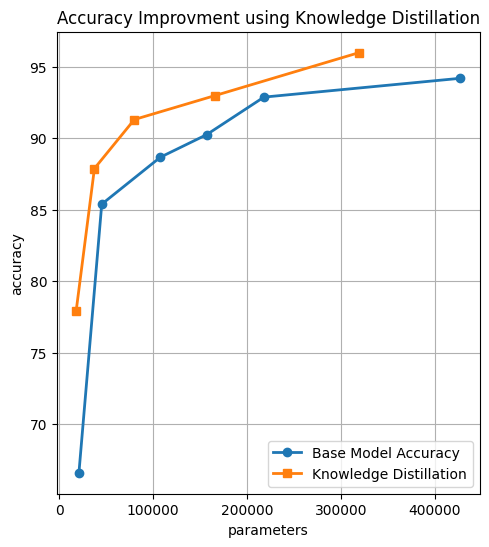

In [689]:
plt.figure(figsize = (12,6))
plt.subplot(1, 2, 1)
plt.plot(base_par, base_acc, 'o-', label = 'Base Model Accuracy', linewidth = 2)
plt.plot(kd_par, kd_acc, 's-', label = 'Knowledge Distillation', linewidth = 2)
plt.xlabel('parameters')
plt.ylabel('accuracy')
plt.title('Accuracy Improvment using Knowledge Distillation')
plt.legend()
plt.grid(True)